In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# scikit-learn modules
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import RandomizedSearchCV

C:\Users\anilo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np
import tensorflow as tf
import os
import random as rn

# The below is necessary for starting Numpy generated random numbers in a well-defined initial state.
np.random.seed(42)

# The below is necessary for starting core Python generated random numbers in a well-defined state.
rn.seed(12345)

# The below set_seed() will make random number generation in the TensorFlow backend have a well-defined initial state.
# For further details, see: https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf.random.set_seed(1234)


In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
def Evolution_Metrics(model,x_test,y_test):
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(color.BOLD)
    print('MAE: ',mae)
    print('MSE: ',mse)
    print('RMSE: ',rmse)
    print('R2: ',r2)
    print(color.END)

# Each RunId Bucket

In [4]:
def preprocess(df):
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load='FAU'
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    run_list = ['Time', 'Load', 'SeaTemp', 'WindSpeed', 'RunId']
    df_sample=df[abr_sensor_list+run_list]
    df_sample=df_sample[df_sample['SeaTemp']==SeaTemp]
    df_sample=df_sample[df_sample['WindSpeed']==WindSpeed]
    df_sample=df_sample[df_sample['Load']==Load]
    resample_list=[]
    output=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        y=s.iloc[::4, :]['Z02013']
        s.drop(columns=['Z02013'],inplace=True)
        grouped_df = s.groupby(s.index // 4).mean()
        resample_list.append(grouped_df)
        output.append(y)
    df1 = pd.concat(resample_list, axis=0)
    df1.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        grouped_df = s.groupby(s.index // 4).max()
        resample_list.append(grouped_df)
    df2 = pd.concat(resample_list, axis=0)
    df2.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        grouped_df = s.groupby(s.index // 4).min()
        resample_list.append(grouped_df)
    df3 = pd.concat(resample_list, axis=0)
    df3.reset_index(drop=True,inplace=True)
    df = pd.concat([df1, df2, df3], axis=1)
    x = df
    y = pd.concat(output, axis=0)
    y.reset_index(drop=True,inplace=True)
    return x ,y

In [5]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1410
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1409
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1408
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1407
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778855,00:23:47,FAU,SW28,WC6,35,12.4944,25.0092,3353.82,12.9058,2.91922,...,0.0,16.1273,6,16.1544,31.5922,0.0,1.0,0,0,4
778856,00:23:48,FAU,SW28,WC6,35,12.4761,24.9927,3353.82,12.7802,2.91487,...,0.0,16.1317,6,16.1275,31.5982,0.0,1.0,0,0,3
778857,00:23:49,FAU,SW28,WC6,35,12.4578,24.9762,3353.82,12.6545,2.91053,...,0.0,16.1361,6,16.1005,31.6042,0.0,1.0,0,0,2
778858,00:23:50,FAU,SW28,WC6,35,12.4395,24.9597,3353.82,12.5288,2.90618,...,0.0,16.1405,6,16.0736,31.6102,0.0,1.0,0,0,1


In [6]:
y = df['Z02013']
type(y)

pandas.core.series.Series

In [7]:
X_train , Y_train = preprocess(df)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [8]:
X_train

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T01601,T01603,T02014,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970
0,14.033825,305.55825,56.30100,13.809175,2.639642,2.834907,2.640425,73.956575,7.789537,2.153763,...,43.5331,348.143,305.317,303.497,-1.82216,43.7888,48.0049,220.359,12.8062,12.8297
1,14.005075,327.46400,788.21375,13.775850,2.647335,2.836055,2.648525,73.934000,7.789335,2.154190,...,43.5319,348.450,305.349,303.541,-1.83174,43.7502,48.0043,220.370,12.8063,12.8876
2,14.042100,304.82850,1689.02750,13.818000,2.640332,2.837467,2.641055,73.962475,7.789135,2.154530,...,43.5307,348.401,305.413,303.591,-1.84132,43.7116,48.0038,220.383,12.8065,12.8771
3,14.079175,282.19250,2589.84500,13.860175,2.633325,2.838880,2.633585,73.990975,7.788935,2.154870,...,43.5295,348.352,305.478,303.641,-1.85091,43.6729,48.0032,220.396,12.8067,12.8666
4,14.101650,267.10325,3150.32500,13.885750,2.628635,2.839380,2.628602,74.008350,7.788915,2.155350,...,43.5292,348.340,305.542,303.691,-1.85330,43.6633,48.0031,220.408,12.8069,12.8557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11088,14.094350,261.61750,3131.57500,13.878475,2.625430,2.834192,2.625402,74.001700,7.789920,2.156467,...,43.5347,348.376,305.445,303.972,-1.48109,43.9690,48.0087,220.397,12.8043,12.8197
11089,14.096150,255.75850,3131.19000,13.880425,2.624820,2.833965,2.624785,74.001700,7.790100,2.156413,...,43.5328,348.376,305.500,304.039,-1.47201,43.9122,48.0087,220.407,12.8043,12.8133
11090,14.096925,250.91025,3130.95000,13.881100,2.624157,2.833580,2.624128,74.001700,7.790287,2.156290,...,43.5323,348.304,305.556,304.106,-1.46292,43.8772,48.0087,220.418,12.8043,12.8043
11091,14.096050,247.74675,3130.95000,13.879650,2.623415,2.832935,2.623400,74.001700,7.790495,2.156050,...,43.5323,348.209,305.560,304.116,-1.45080,43.8493,48.0087,220.440,12.8043,12.7945


In [9]:
Y_train

0        19.9715
1        20.6244
2        20.4081
3        20.1917
4        19.9754
          ...   
11088    19.9671
11089    19.9742
11090    19.9814
11091    19.9814
11092    19.9814
Name: Z02013, Length: 11093, dtype: float64

In [10]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1413
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1412
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1411
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1410
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402488,00:19:20,FAU,SW28,WC6,53,13.5748,25.1889,3573.65,12.2076,3.11218,...,0.0,16.2952,6,16.9101,31.4515,0.0,1.0,0,0,4
402489,00:19:21,FAU,SW28,WC6,53,13.5252,25.1680,3573.65,11.9689,3.09877,...,0.0,16.2934,6,16.9109,31.3278,0.0,1.0,0,0,3
402490,00:19:22,FAU,SW28,WC6,53,13.4756,25.1472,3573.65,11.7302,3.08536,...,0.0,16.2917,6,16.9116,31.2041,0.0,1.0,0,0,2
402491,00:19:23,FAU,SW28,WC6,53,13.4259,25.1263,3573.65,11.4916,3.07195,...,0.0,16.2899,6,16.9123,31.0804,0.0,1.0,0,0,1


In [11]:
X_test , Y_test = preprocess(dft)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
scaler=StandardScaler()
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(Y_train.values.reshape(-1, 1))

In [14]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [15]:
Evolution_Metrics(model_3,X_test,Y_test)


MAE:  0.0027590663345821802
MSE:  6.410341156010164e-05
RMSE:  0.008006460613785698
R2:  0.9570171749712255



In [16]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train_scaled, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [17]:
Evolution_Metrics(model_3,X_test_scaled,Y_test)


MAE:  0.002761198154446291
MSE:  6.420712634791178e-05
RMSE:  0.008012934939702916
R2:  0.9569476317992033



In [18]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train_scaled, Y_train_scaled)

C:\Users\anilo\AppData\Local\Temp/ipykernel_12572/3914077697.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(X_train_scaled, Y_train_scaled)


RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [19]:
Evolution_Metrics(model_3,X_test_scaled,Y_test)


MAE:  19.989326219369737
MSE:  400.38467159566704
RMSE:  20.009614478936545
R2:  -268466.21359384374



In [20]:
model = Sequential()

model.add(Dense(96, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(384))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(32))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                               decay_steps=10000,
                               decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                10176     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96)                0         
                                                                 
 batch_normalization (BatchN  (None, 96)               384       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 384)               37248     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 384)               0         
                                                        

In [21]:
history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
278/278 [==============================] - 4s 6ms/step - loss: 0.6988 - mse: 0.6988 - val_loss: 0.2489 - val_mse: 0.2489
Epoch 2/100
278/278 [==============================] - 1s 5ms/step - loss: 0.4065 - mse: 0.4065 - val_loss: 0.2816 - val_mse: 0.2816
Epoch 3/100
278/278 [==============================] - 1s 5ms/step - loss: 0.3277 - mse: 0.3277 - val_loss: 0.3742 - val_mse: 0.3742
Epoch 4/100
278/278 [==============================] - 1s 5ms/step - loss: 0.2936 - mse: 0.2936 - val_loss: 0.1563 - val_mse: 0.1563
Epoch 5/100
278/278 [==============================] - 1s 5ms/step - loss: 0.2693 - mse: 0.2693 - val_loss: 0.1438 - val_mse: 0.1438
Epoch 6/100
278/278 [==============================] - 1s 5ms/step - loss: 0.2503 - mse: 0.2503 - val_loss: 0.5411 - val_mse: 0.5411
Epoch 7/100
278/278 [==============================] - 1s 5ms/step - loss: 0.2731 - mse: 0.2731 - val_loss: 0.1783 - val_mse: 0.1783
Epoch 8/100
278/278 [==============================] - 1s 5ms/step - 

In [22]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

169/169 [==============================] - 0s 2ms/step
Root Mean Squared Error: 0.013582257632662555


# Each RunId Window

In [23]:
def preprocess(df):
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load='FAU'
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    run_list = ['Time', 'Load', 'SeaTemp', 'WindSpeed', 'RunId']
    df_sample=df[abr_sensor_list+run_list]
    df_sample=df_sample[df_sample['SeaTemp']==SeaTemp]
    df_sample=df_sample[df_sample['WindSpeed']==WindSpeed]
    df_sample=df_sample[df_sample['Load']==Load]
    resample_list=[]
    output=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        y=s['Z02013']
        y=y.shift(-(4 - 1)) # Shift so that last value in window corresponds to first position
        y=y.rolling(1).mean() # Get rightmost value from each original window
        y.dropna(inplace=True)
        y.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        rolling_mean = s.rolling(4).mean()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
        output.append(y)
    df1 = pd.concat(resample_list, axis=0)
    df1.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(4).max()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df2 = pd.concat(resample_list, axis=0)
    df2.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(4).min()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df3 = pd.concat(resample_list, axis=0)
    df3.reset_index(drop=True,inplace=True)
    df = pd.concat([df1, df2, df3], axis=1)
    x = df
    y = pd.concat(output, axis=0)
    y.reset_index(drop=True,inplace=True)
    return x ,y

In [24]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1410
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1409
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1408
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1407
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778855,00:23:47,FAU,SW28,WC6,35,12.4944,25.0092,3353.82,12.9058,2.91922,...,0.0,16.1273,6,16.1544,31.5922,0.0,1.0,0,0,4
778856,00:23:48,FAU,SW28,WC6,35,12.4761,24.9927,3353.82,12.7802,2.91487,...,0.0,16.1317,6,16.1275,31.5982,0.0,1.0,0,0,3
778857,00:23:49,FAU,SW28,WC6,35,12.4578,24.9762,3353.82,12.6545,2.91053,...,0.0,16.1361,6,16.1005,31.6042,0.0,1.0,0,0,2
778858,00:23:50,FAU,SW28,WC6,35,12.4395,24.9597,3353.82,12.5288,2.90618,...,0.0,16.1405,6,16.0736,31.6102,0.0,1.0,0,0,1


In [25]:
X_train , Y_train = preprocess(df)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [26]:
X_train

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T01601,T01603,T02014,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970
0,14.033825,305.55825,56.30100,13.809175,2.639642,2.834907,2.640425,73.956575,7.789537,2.153763,...,43.5331,348.143,305.317,303.497,-1.82216,43.7888,48.0049,220.359,12.8062,12.8297
1,14.009025,322.87725,168.90300,13.780650,2.645460,2.835085,2.646578,73.937275,7.789492,2.153880,...,43.5328,348.143,305.317,303.497,-1.82455,43.7792,48.0047,220.359,12.8062,12.8297
2,13.986525,338.78150,337.80600,13.754775,2.650840,2.835350,2.652262,73.919750,7.789435,2.154020,...,43.5325,348.474,305.317,303.516,-1.82695,43.7695,48.0046,220.364,12.8062,12.8928
3,13.995800,333.12275,563.00975,13.765300,2.649087,2.835703,2.650395,73.926875,7.789385,2.154105,...,43.5322,348.462,305.333,303.529,-1.82934,43.7599,48.0045,220.367,12.8062,12.8902
4,14.005075,327.46400,788.21375,13.775850,2.647335,2.836055,2.648525,73.934000,7.789335,2.154190,...,43.5319,348.450,305.349,303.541,-1.83174,43.7502,48.0043,220.370,12.8063,12.8876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44218,14.096500,249.32850,3130.95000,13.880375,2.623785,2.833260,2.623762,74.001700,7.790392,2.156170,...,43.5323,348.257,305.558,304.111,-1.45686,43.8632,48.0087,220.429,12.8043,12.7994
44219,14.096275,248.53750,3130.95000,13.880025,2.623600,2.833098,2.623580,74.001700,7.790445,2.156110,...,43.5323,348.233,305.559,304.113,-1.45383,43.8563,48.0087,220.435,12.8043,12.7970
44220,14.096050,247.74675,3130.95000,13.879650,2.623415,2.832935,2.623400,74.001700,7.790495,2.156050,...,43.5323,348.209,305.560,304.116,-1.45080,43.8493,48.0087,220.440,12.8043,12.7945
44221,14.095825,246.95600,3130.95000,13.879300,2.623230,2.832773,2.623220,74.001700,7.790545,2.155990,...,43.5323,348.185,305.562,304.118,-1.44776,43.8423,48.0087,220.446,12.8043,12.7921


In [27]:
Y_train

0        20.6785
1        20.6244
2        20.5703
3        20.5163
4        20.4622
          ...   
44218    19.9814
44219    19.9814
44220    19.9814
44221    19.9814
44222    19.9814
Name: Z02013, Length: 44223, dtype: float64

In [28]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1413
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1412
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1411
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1410
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402488,00:19:20,FAU,SW28,WC6,53,13.5748,25.1889,3573.65,12.2076,3.11218,...,0.0,16.2952,6,16.9101,31.4515,0.0,1.0,0,0,4
402489,00:19:21,FAU,SW28,WC6,53,13.5252,25.1680,3573.65,11.9689,3.09877,...,0.0,16.2934,6,16.9109,31.3278,0.0,1.0,0,0,3
402490,00:19:22,FAU,SW28,WC6,53,13.4756,25.1472,3573.65,11.7302,3.08536,...,0.0,16.2917,6,16.9116,31.2041,0.0,1.0,0,0,2
402491,00:19:23,FAU,SW28,WC6,53,13.4259,25.1263,3573.65,11.4916,3.07195,...,0.0,16.2899,6,16.9123,31.0804,0.0,1.0,0,0,1


In [29]:
X_test , Y_test = preprocess(dft)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
scaler=StandardScaler()
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(Y_train.values.reshape(-1, 1))

In [32]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [33]:
Evolution_Metrics(model_3,X_test,Y_test)


MAE:  0.0018121468580672086
MSE:  3.811351233400561e-05
RMSE:  0.0061736142035282385
R2:  0.9720246305868635



In [34]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train_scaled, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [35]:
Evolution_Metrics(model_3,X_test_scaled,Y_test)


MAE:  0.0018137491946430082
MSE:  3.8499730075087596e-05
RMSE:  0.006204815071788006
R2:  0.9717411462444604



In [36]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train_scaled, Y_train_scaled)

C:\Users\anilo\AppData\Local\Temp/ipykernel_12572/3914077697.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_3.fit(X_train_scaled, Y_train_scaled)


RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [37]:
Evolution_Metrics(model_3,X_test_scaled,Y_test)


MAE:  19.979783140895922
MSE:  400.15714938633175
RMSE:  20.003928348860175
R2:  -293714.8868825191



In [38]:
model = Sequential()

model.add(Dense(96, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(384))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(32))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                               decay_steps=10000,
                               decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 96)                10176     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 96)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 96)               384       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense_5 (Dense)             (None, 384)               37248     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 384)               0         
                                                      

In [39]:
history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1106/1106 [==============================] - 7s 5ms/step - loss: 0.3296 - mse: 0.3296 - val_loss: 0.3122 - val_mse: 0.3122
Epoch 2/100
1106/1106 [==============================] - 5s 5ms/step - loss: 0.1855 - mse: 0.1855 - val_loss: 0.2299 - val_mse: 0.2299
Epoch 3/100
1106/1106 [==============================] - 5s 5ms/step - loss: 0.1581 - mse: 0.1581 - val_loss: 0.2283 - val_mse: 0.2283
Epoch 4/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1458 - mse: 0.1458 - val_loss: 0.1932 - val_mse: 0.1932
Epoch 5/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1254 - mse: 0.1254 - val_loss: 0.1974 - val_mse: 0.1974
Epoch 6/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1192 - mse: 0.1192 - val_loss: 0.2193 - val_mse: 0.2193
Epoch 7/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1113 - mse: 0.1113 - val_loss: 0.2150 - val_mse: 0.2150
Epoch 8/100
1106/1106 [==============================] 

In [40]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

674/674 [==============================] - 2s 3ms/step
Root Mean Squared Error: 0.00911957454867337


# Each RunId Bucket PCA

In [41]:
def preprocess(df):
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load='FAU'
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    run_list = ['Time', 'Load', 'SeaTemp', 'WindSpeed', 'RunId']
    df_sample=df[abr_sensor_list+run_list]
    df_sample=df_sample[df_sample['SeaTemp']==SeaTemp]
    df_sample=df_sample[df_sample['WindSpeed']==WindSpeed]
    df_sample=df_sample[df_sample['Load']==Load]
    resample_list=[]
    output=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        y=s.iloc[::4, :]['Z02013']
        s.drop(columns=['Z02013'],inplace=True)
        grouped_df = s.groupby(s.index // 4).mean()
        resample_list.append(grouped_df)
        output.append(y)
    df1 = pd.concat(resample_list, axis=0)
    df1.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        grouped_df = s.groupby(s.index // 4).max()
        resample_list.append(grouped_df)
    df2 = pd.concat(resample_list, axis=0)
    df2.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        grouped_df = s.groupby(s.index // 4).min()
        resample_list.append(grouped_df)
    df3 = pd.concat(resample_list, axis=0)
    df3.reset_index(drop=True,inplace=True)
    df = pd.concat([df1, df2, df3], axis=1)
    x = df
    y = pd.concat(output, axis=0)
    y.reset_index(drop=True,inplace=True)
    return x ,y

In [42]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1410
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1409
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1408
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1407
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778855,00:23:47,FAU,SW28,WC6,35,12.4944,25.0092,3353.82,12.9058,2.91922,...,0.0,16.1273,6,16.1544,31.5922,0.0,1.0,0,0,4
778856,00:23:48,FAU,SW28,WC6,35,12.4761,24.9927,3353.82,12.7802,2.91487,...,0.0,16.1317,6,16.1275,31.5982,0.0,1.0,0,0,3
778857,00:23:49,FAU,SW28,WC6,35,12.4578,24.9762,3353.82,12.6545,2.91053,...,0.0,16.1361,6,16.1005,31.6042,0.0,1.0,0,0,2
778858,00:23:50,FAU,SW28,WC6,35,12.4395,24.9597,3353.82,12.5288,2.90618,...,0.0,16.1405,6,16.0736,31.6102,0.0,1.0,0,0,1


In [43]:
X_train , Y_train = preprocess(df)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [44]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1413
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1412
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1411
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1410
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402488,00:19:20,FAU,SW28,WC6,53,13.5748,25.1889,3573.65,12.2076,3.11218,...,0.0,16.2952,6,16.9101,31.4515,0.0,1.0,0,0,4
402489,00:19:21,FAU,SW28,WC6,53,13.5252,25.1680,3573.65,11.9689,3.09877,...,0.0,16.2934,6,16.9109,31.3278,0.0,1.0,0,0,3
402490,00:19:22,FAU,SW28,WC6,53,13.4756,25.1472,3573.65,11.7302,3.08536,...,0.0,16.2917,6,16.9116,31.2041,0.0,1.0,0,0,2
402491,00:19:23,FAU,SW28,WC6,53,13.4259,25.1263,3573.65,11.4916,3.07195,...,0.0,16.2899,6,16.9123,31.0804,0.0,1.0,0,0,1


In [45]:
X_test , Y_test = preprocess(dft)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
scaler=StandardScaler()
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(Y_train.values.reshape(-1, 1))

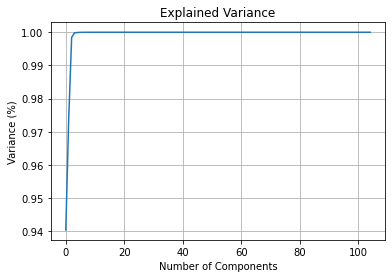

In [48]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X is your standardized dataset
pca = PCA().fit(X_train)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Explained Variance')
plt.grid(True)
plt.show()


In [49]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.where(cumulative_variance > 0.95)[0][0] + 1
print(n_components)

2


In [50]:
best_rmse = np.inf  # Start with infinity so that any score will be better
best_n = 0

for nn in range(1, X_train.shape[1]+1):  # Start from 1 as PCA with 0 components doesn't make sense
    # Create a PCA object, specifying how many components you wish to keep
    pca = PCA(n_components=nn)
    print(nn)
    # Fit the PCA model to your data and then apply the dimensionality reduction on train and test data
    pca.fit(X_train_scaled)
    X_pca_train = pca.transform(X_train_scaled)
    X_pca_test = pca.transform(X_test_scaled)

    # Create a RandomForestRegressor with the best parameters
    model = RandomForestRegressor(
        n_estimators= 400, 
        min_samples_split=5, 
        min_samples_leaf=1, 
        max_features="log2", 
        max_depth=30, 
        bootstrap=False,
        random_state=42,  # Seed
        n_jobs=-1  # Use all processors
    )

    # Train the model
    model.fit(X_pca_train, Y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_pca_test)

    # Calculate the RMSE
    rmse = mean_squared_error(Y_test, y_pred, squared=False)

    # If this RMSE is the best we've seen, store this n_components and score
    if rmse < best_rmse:
        best_rmse = rmse
        best_n = nn

print(f"Best number of components: {best_n}")
print(f"RMSE: {best_rmse}")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
Best number of components: 9
RMSE: 0.008592941885868201


In [51]:


best_rmse = np.inf  # Start with infinity so that any score will be better
best_n = 0

for nn in range(1, X_train.shape[1]+1):  # Start from 1 as PCA with 0 components doesn't make sense
    # Create a PCA object, specifying how many components you wish to keep
    pca = PCA(n_components=nn)
    print(nn)
    # Fit the PCA model to your data and then apply the dimensionality reduction on train and test data
    pca.fit(X_train)
    X_pca_train = pca.transform(X_train_scaled)
    X_pca_test = pca.transform(X_test_scaled)

    # Define the model structure
    model = Sequential()
    model.add(Dense(96, input_dim=nn))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(384))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(32))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(1))

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    # Define learning rate decay
    lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                                decay_steps=10000,
                                decay_rate=0.9)

    optimizer = Adam(learning_rate=lr_schedule)

    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

    history = model.fit(X_pca_train, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

    # Make predictions on the test set
    y_pred_scaled = model.predict(X_pca_test)
    y_pred = scaler.inverse_transform(y_pred_scaled)

    # Calculate the RMSE
    rmse = mean_squared_error(Y_test, y_pred, squared=False)

    # If this RMSE is the best we've seen, store this n_components and score
    if rmse < best_rmse:
        best_rmse = rmse
        best_n = nn

print(f"Best number of components: {best_n}")
print(f"RMSE: {best_rmse}")


1
Epoch 1/100
278/278 [==============================] - 3s 6ms/step - loss: 1.2039 - mse: 1.2039 - val_loss: 973.8994 - val_mse: 973.8994
Epoch 2/100
278/278 [==============================] - 1s 5ms/step - loss: 1.0548 - mse: 1.0548 - val_loss: 74092.3984 - val_mse: 74092.3984
Epoch 3/100
278/278 [==============================] - 1s 5ms/step - loss: 1.0485 - mse: 1.0485 - val_loss: 60200.6133 - val_mse: 60200.6133
Epoch 4/100
278/278 [==============================] - 1s 5ms/step - loss: 1.0389 - mse: 1.0389 - val_loss: 33763.2891 - val_mse: 33763.2891
Epoch 5/100
278/278 [==============================] - 1s 5ms/step - loss: 1.0311 - mse: 1.0311 - val_loss: 213556.6250 - val_mse: 213556.6250
Epoch 6/100
278/278 [==============================] - 1s 5ms/step - loss: 1.0208 - mse: 1.0208 - val_loss: 6671.0557 - val_mse: 6671.0557
Epoch 7/100
278/278 [==============================] - 1s 5ms/step - loss: 1.0165 - mse: 1.0165 - val_loss: 23967.6582 - val_mse: 23967.6582
Epoch 8/100
278

Epoch 11/100
169/169 [==============================] - 0s 2ms/step
5
Epoch 1/100
278/278 [==============================] - 3s 6ms/step - loss: 0.8996 - mse: 0.8996 - val_loss: 1185.8719 - val_mse: 1185.8719
Epoch 2/100
278/278 [==============================] - 2s 6ms/step - loss: 0.6904 - mse: 0.6904 - val_loss: 731.8514 - val_mse: 731.8514
Epoch 3/100
278/278 [==============================] - 2s 6ms/step - loss: 0.6063 - mse: 0.6063 - val_loss: 1318.2643 - val_mse: 1318.2643
Epoch 4/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5956 - mse: 0.5956 - val_loss: 2.3848 - val_mse: 2.3848
Epoch 5/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5811 - mse: 0.5811 - val_loss: 4325.3657 - val_mse: 4325.3657
Epoch 6/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5557 - mse: 0.5557 - val_loss: 10809.5752 - val_mse: 10809.5752
Epoch 7/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5557 - mse: 0.5557 - val_

169/169 [==============================] - 0s 2ms/step
9
Epoch 1/100
278/278 [==============================] - 3s 7ms/step - loss: 0.7139 - mse: 0.7139 - val_loss: 523.3874 - val_mse: 523.3874
Epoch 2/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5658 - mse: 0.5658 - val_loss: 49.9330 - val_mse: 49.9330
Epoch 3/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5367 - mse: 0.5367 - val_loss: 49.6529 - val_mse: 49.6529
Epoch 4/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5238 - mse: 0.5238 - val_loss: 294.1343 - val_mse: 294.1343
Epoch 5/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5290 - mse: 0.5290 - val_loss: 29.5503 - val_mse: 29.5503
Epoch 6/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5054 - mse: 0.5054 - val_loss: 744.6885 - val_mse: 744.6885
Epoch 7/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5040 - mse: 0.5040 - val_loss: 2259.6804 - val_mse

Epoch 4/100
278/278 [==============================] - 2s 6ms/step - loss: 0.4958 - mse: 0.4958 - val_loss: 108.2016 - val_mse: 108.2016
Epoch 5/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5015 - mse: 0.5015 - val_loss: 275.2032 - val_mse: 275.2032
Epoch 6/100
278/278 [==============================] - 2s 6ms/step - loss: 0.4693 - mse: 0.4693 - val_loss: 782.1884 - val_mse: 782.1884
Epoch 7/100
278/278 [==============================] - 2s 6ms/step - loss: 0.4643 - mse: 0.4643 - val_loss: 663.6257 - val_mse: 663.6257
Epoch 8/100
278/278 [==============================] - 2s 6ms/step - loss: 0.4436 - mse: 0.4436 - val_loss: 332.0081 - val_mse: 332.0081
Epoch 9/100
278/278 [==============================] - 2s 6ms/step - loss: 0.4632 - mse: 0.4632 - val_loss: 29.1468 - val_mse: 29.1468
Epoch 10/100
278/278 [==============================] - 2s 6ms/step - loss: 0.4412 - mse: 0.4412 - val_loss: 2044.2184 - val_mse: 2044.2184
Epoch 11/100
278/278 [==================

Epoch 11/100
278/278 [==============================] - 2s 6ms/step - loss: 0.3619 - mse: 0.3619 - val_loss: 64494.3359 - val_mse: 64494.3359
Epoch 12/100
278/278 [==============================] - 2s 6ms/step - loss: 0.3601 - mse: 0.3601 - val_loss: 659.0420 - val_mse: 659.0420
Epoch 13/100
278/278 [==============================] - 2s 6ms/step - loss: 0.3541 - mse: 0.3541 - val_loss: 1951.8297 - val_mse: 1951.8297
Epoch 14/100
278/278 [==============================] - 2s 6ms/step - loss: 0.3435 - mse: 0.3435 - val_loss: 58.8888 - val_mse: 58.8888
Epoch 15/100
169/169 [==============================] - 0s 2ms/step
17
Epoch 1/100
278/278 [==============================] - 3s 7ms/step - loss: 0.7233 - mse: 0.7233 - val_loss: 321.9875 - val_mse: 321.9875
Epoch 2/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5427 - mse: 0.5427 - val_loss: 46.8831 - val_mse: 46.8831
Epoch 3/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5169 - mse: 0.5169 - val

Epoch 11/100
278/278 [==============================] - 2s 5ms/step - loss: 0.4066 - mse: 0.4066 - val_loss: 17179.3789 - val_mse: 17179.3789
Epoch 12/100
278/278 [==============================] - 2s 5ms/step - loss: 0.4074 - mse: 0.4074 - val_loss: 39.3318 - val_mse: 39.3318
Epoch 13/100
169/169 [==============================] - 0s 2ms/step
21
Epoch 1/100
278/278 [==============================] - 3s 7ms/step - loss: 0.6821 - mse: 0.6821 - val_loss: 168.6985 - val_mse: 168.6985
Epoch 2/100
278/278 [==============================] - 2s 6ms/step - loss: 0.5463 - mse: 0.5463 - val_loss: 163.9210 - val_mse: 163.9210
Epoch 3/100
278/278 [==============================] - 2s 6ms/step - loss: 0.4907 - mse: 0.4907 - val_loss: 160.7252 - val_mse: 160.7252
Epoch 4/100
278/278 [==============================] - 2s 6ms/step - loss: 0.4658 - mse: 0.4658 - val_loss: 9.1555 - val_mse: 9.1555
Epoch 5/100
278/278 [==============================] - 2s 6ms/step - loss: 0.4726 - mse: 0.4726 - val_loss:

Epoch 13/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2875 - mse: 0.2875 - val_loss: 6453.2988 - val_mse: 6453.2988
Epoch 14/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2697 - mse: 0.2697 - val_loss: 5123.7700 - val_mse: 5123.7700
Epoch 15/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2691 - mse: 0.2691 - val_loss: 0.6499 - val_mse: 0.6499
Epoch 16/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2262 - mse: 0.2262 - val_loss: 224.8473 - val_mse: 224.8473
Epoch 17/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2348 - mse: 0.2348 - val_loss: 8309.7490 - val_mse: 8309.7490
Epoch 18/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2454 - mse: 0.2454 - val_loss: 4990.9370 - val_mse: 4990.9370
Epoch 19/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2401 - mse: 0.2401 - val_loss: 2946.2014 - val_mse: 2946.2014
Epoch 20/100
278/278 [======

Epoch 19/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2132 - mse: 0.2132 - val_loss: 13998.5674 - val_mse: 13998.5674
Epoch 20/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2354 - mse: 0.2354 - val_loss: 39.3143 - val_mse: 39.3143
Epoch 21/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1688 - mse: 0.1688 - val_loss: 16.1955 - val_mse: 16.1955
Epoch 22/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1876 - mse: 0.1876 - val_loss: 1174.5867 - val_mse: 1174.5867
Epoch 23/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1734 - mse: 0.1734 - val_loss: 20.3889 - val_mse: 20.3889
Epoch 24/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1697 - mse: 0.1697 - val_loss: 50.0866 - val_mse: 50.0866
Epoch 25/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1708 - mse: 0.1708 - val_loss: 87.6513 - val_mse: 87.6513
Epoch 26/100
169/169 [================

278/278 [==============================] - 2s 6ms/step - loss: 0.1684 - mse: 0.1684 - val_loss: 57.0520 - val_mse: 57.0520
Epoch 25/100
169/169 [==============================] - 0s 2ms/step
34
Epoch 1/100
278/278 [==============================] - 3s 7ms/step - loss: 0.6775 - mse: 0.6775 - val_loss: 5981.6099 - val_mse: 5981.6099
Epoch 2/100
278/278 [==============================] - 2s 6ms/step - loss: 0.4447 - mse: 0.4447 - val_loss: 470.3816 - val_mse: 470.3816
Epoch 3/100
278/278 [==============================] - 2s 6ms/step - loss: 0.3587 - mse: 0.3587 - val_loss: 503.3683 - val_mse: 503.3683
Epoch 4/100
278/278 [==============================] - 2s 6ms/step - loss: 0.3380 - mse: 0.3380 - val_loss: 33.7900 - val_mse: 33.7900
Epoch 5/100
278/278 [==============================] - 2s 6ms/step - loss: 0.3409 - mse: 0.3409 - val_loss: 135.2609 - val_mse: 135.2609
Epoch 6/100
278/278 [==============================] - 2s 6ms/step - loss: 0.3020 - mse: 0.3020 - val_loss: 1311.2328 - v

Epoch 6/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2908 - mse: 0.2908 - val_loss: 11883.9844 - val_mse: 11883.9844
Epoch 7/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2719 - mse: 0.2719 - val_loss: 4963.7090 - val_mse: 4963.7090
Epoch 8/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2473 - mse: 0.2473 - val_loss: 15146.3037 - val_mse: 15146.3037
Epoch 9/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2561 - mse: 0.2561 - val_loss: 414.7767 - val_mse: 414.7767
Epoch 10/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2414 - mse: 0.2414 - val_loss: 444.6939 - val_mse: 444.6939
Epoch 11/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2438 - mse: 0.2438 - val_loss: 38424.3203 - val_mse: 38424.3203
Epoch 12/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2312 - mse: 0.2312 - val_loss: 187.8990 - val_mse: 187.8990
Epoch 13/100
278/278 [==

278/278 [==============================] - 2s 6ms/step - loss: 0.2567 - mse: 0.2567 - val_loss: 11.4294 - val_mse: 11.4294
Epoch 13/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2358 - mse: 0.2358 - val_loss: 15703.5381 - val_mse: 15703.5381
Epoch 14/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2231 - mse: 0.2231 - val_loss: 47962.1406 - val_mse: 47962.1406
Epoch 15/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2739 - mse: 0.2739 - val_loss: 218.4643 - val_mse: 218.4643
Epoch 16/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1999 - mse: 0.1999 - val_loss: 46.9430 - val_mse: 46.9430
Epoch 17/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2107 - mse: 0.2107 - val_loss: 9948.1699 - val_mse: 9948.1699
Epoch 18/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1997 - mse: 0.1997 - val_loss: 1887.0221 - val_mse: 1887.0221
Epoch 19/100
278/278 [=================

278/278 [==============================] - 2s 6ms/step - loss: 0.3145 - mse: 0.3145 - val_loss: 2.2888 - val_mse: 2.2888
Epoch 6/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2813 - mse: 0.2813 - val_loss: 17972.9766 - val_mse: 17972.9766
Epoch 7/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2923 - mse: 0.2923 - val_loss: 1507.2283 - val_mse: 1507.2283
Epoch 8/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2612 - mse: 0.2612 - val_loss: 14465.1035 - val_mse: 14465.1035
Epoch 9/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2565 - mse: 0.2565 - val_loss: 1.0489 - val_mse: 1.0489
Epoch 10/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2757 - mse: 0.2757 - val_loss: 2.7096 - val_mse: 2.7096
Epoch 11/100
278/278 [==============================] - 2s 7ms/step - loss: 0.2349 - mse: 0.2349 - val_loss: 4583.3696 - val_mse: 4583.3696
Epoch 12/100
278/278 [=============================

278/278 [==============================] - 2s 6ms/step - loss: 0.2299 - mse: 0.2299 - val_loss: 83157.7266 - val_mse: 83157.7266
Epoch 12/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2059 - mse: 0.2059 - val_loss: 38.2120 - val_mse: 38.2120
Epoch 13/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1965 - mse: 0.1965 - val_loss: 63.2880 - val_mse: 63.2880
Epoch 14/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1989 - mse: 0.1989 - val_loss: 13214.5898 - val_mse: 13214.5898
Epoch 15/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2085 - mse: 0.2085 - val_loss: 1.1309 - val_mse: 1.1309
Epoch 16/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1839 - mse: 0.1839 - val_loss: 35.8351 - val_mse: 35.8351
Epoch 17/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1710 - mse: 0.1710 - val_loss: 25.7367 - val_mse: 25.7367
Epoch 18/100
278/278 [=============================

278/278 [==============================] - 2s 6ms/step - loss: 0.2812 - mse: 0.2812 - val_loss: 6.7980 - val_mse: 6.7980
Epoch 8/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2417 - mse: 0.2417 - val_loss: 10458.4531 - val_mse: 10458.4531
Epoch 9/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2361 - mse: 0.2361 - val_loss: 8950.2607 - val_mse: 8950.2607
Epoch 10/100
278/278 [==============================] - 2s 7ms/step - loss: 0.2168 - mse: 0.2168 - val_loss: 575.3323 - val_mse: 575.3323
Epoch 11/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2130 - mse: 0.2130 - val_loss: 91342.7734 - val_mse: 91342.7734
Epoch 12/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2232 - mse: 0.2232 - val_loss: 675.1362 - val_mse: 675.1362
Epoch 13/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1909 - mse: 0.1909 - val_loss: 7012.9795 - val_mse: 7012.9795
Epoch 14/100
278/278 [===================

278/278 [==============================] - 2s 6ms/step - loss: 0.2578 - mse: 0.2578 - val_loss: 20339.0137 - val_mse: 20339.0137
Epoch 7/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2557 - mse: 0.2557 - val_loss: 339.0409 - val_mse: 339.0409
Epoch 8/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2235 - mse: 0.2235 - val_loss: 8498.4111 - val_mse: 8498.4111
Epoch 9/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2450 - mse: 0.2450 - val_loss: 41.3797 - val_mse: 41.3797
Epoch 10/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1855 - mse: 0.1855 - val_loss: 4148.3325 - val_mse: 4148.3325
Epoch 11/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1937 - mse: 0.1937 - val_loss: 14029.6729 - val_mse: 14029.6729
Epoch 12/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1946 - mse: 0.1946 - val_loss: 4.6457 - val_mse: 4.6457
Epoch 13/100
278/278 [======================

278/278 [==============================] - 2s 6ms/step - loss: 0.2295 - mse: 0.2295 - val_loss: 323.6039 - val_mse: 323.6039
Epoch 10/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1981 - mse: 0.1981 - val_loss: 236.5394 - val_mse: 236.5394
Epoch 11/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2011 - mse: 0.2011 - val_loss: 13915.4092 - val_mse: 13915.4092
Epoch 12/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1896 - mse: 0.1896 - val_loss: 56.4841 - val_mse: 56.4841
Epoch 13/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1897 - mse: 0.1897 - val_loss: 1665.8733 - val_mse: 1665.8733
Epoch 14/100
169/169 [==============================] - 0s 2ms/step
65
Epoch 1/100
278/278 [==============================] - 4s 7ms/step - loss: 0.7689 - mse: 0.7689 - val_loss: 949.7296 - val_mse: 949.7296
Epoch 2/100
278/278 [==============================] - 2s 6ms/step - loss: 0.4546 - mse: 0.4546 - val_loss: 459

278/278 [==============================] - 2s 6ms/step - loss: 0.1758 - mse: 0.1758 - val_loss: 7236.8872 - val_mse: 7236.8872
Epoch 14/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1580 - mse: 0.1580 - val_loss: 2017.3822 - val_mse: 2017.3822
Epoch 15/100
278/278 [==============================] - 2s 7ms/step - loss: 0.1655 - mse: 0.1655 - val_loss: 264.1493 - val_mse: 264.1493
Epoch 16/100
278/278 [==============================] - 2s 7ms/step - loss: 0.1633 - mse: 0.1633 - val_loss: 11.0059 - val_mse: 11.0059
Epoch 17/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1559 - mse: 0.1559 - val_loss: 6962.7158 - val_mse: 6962.7158
Epoch 18/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1561 - mse: 0.1561 - val_loss: 0.4793 - val_mse: 0.4793
Epoch 19/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1669 - mse: 0.1669 - val_loss: 21295.5234 - val_mse: 21295.5234
Epoch 20/100
278/278 [=====================

278/278 [==============================] - 2s 6ms/step - loss: 0.2623 - mse: 0.2623 - val_loss: 15.9093 - val_mse: 15.9093
Epoch 8/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2103 - mse: 0.2103 - val_loss: 9843.6816 - val_mse: 9843.6816
Epoch 9/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2347 - mse: 0.2347 - val_loss: 5331.3545 - val_mse: 5331.3545
Epoch 10/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1718 - mse: 0.1718 - val_loss: 2.9705 - val_mse: 2.9705
Epoch 11/100
278/278 [==============================] - 2s 7ms/step - loss: 0.1889 - mse: 0.1889 - val_loss: 32246.1426 - val_mse: 32246.1426
Epoch 12/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1815 - mse: 0.1815 - val_loss: 0.8881 - val_mse: 0.8881
Epoch 13/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1609 - mse: 0.1609 - val_loss: 7797.2681 - val_mse: 7797.2681
Epoch 14/100
169/169 [===========================

278/278 [==============================] - 2s 6ms/step - loss: 0.1702 - mse: 0.1702 - val_loss: 1324.4258 - val_mse: 1324.4258
Epoch 14/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1628 - mse: 0.1628 - val_loss: 2532.5239 - val_mse: 2532.5239
Epoch 15/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1689 - mse: 0.1689 - val_loss: 41.8295 - val_mse: 41.8295
Epoch 16/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1672 - mse: 0.1672 - val_loss: 211.3879 - val_mse: 211.3879
Epoch 17/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1410 - mse: 0.1410 - val_loss: 120.2072 - val_mse: 120.2072
Epoch 18/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1440 - mse: 0.1440 - val_loss: 19.6140 - val_mse: 19.6140
Epoch 19/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1498 - mse: 0.1498 - val_loss: 1207.6638 - val_mse: 1207.6638
Epoch 20/100
278/278 [=======================

278/278 [==============================] - 2s 7ms/step - loss: 0.1440 - mse: 0.1440 - val_loss: 3966.8450 - val_mse: 3966.8450
Epoch 14/100
278/278 [==============================] - 2s 7ms/step - loss: 0.1506 - mse: 0.1506 - val_loss: 4236.8223 - val_mse: 4236.8223
Epoch 15/100
278/278 [==============================] - 2s 7ms/step - loss: 0.1751 - mse: 0.1751 - val_loss: 187.6865 - val_mse: 187.6865
Epoch 16/100
278/278 [==============================] - 2s 7ms/step - loss: 0.1514 - mse: 0.1514 - val_loss: 26.3684 - val_mse: 26.3684
Epoch 17/100
278/278 [==============================] - 2s 7ms/step - loss: 0.1434 - mse: 0.1434 - val_loss: 1379.2654 - val_mse: 1379.2654
Epoch 18/100
278/278 [==============================] - 2s 7ms/step - loss: 0.1459 - mse: 0.1459 - val_loss: 12016.0049 - val_mse: 12016.0049
Epoch 19/100
278/278 [==============================] - 2s 7ms/step - loss: 0.1676 - mse: 0.1676 - val_loss: 7594.3760 - val_mse: 7594.3760
Epoch 20/100
278/278 [===============

278/278 [==============================] - 2s 6ms/step - loss: 0.2011 - mse: 0.2011 - val_loss: 4193.6636 - val_mse: 4193.6636
Epoch 9/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1985 - mse: 0.1985 - val_loss: 3542.9475 - val_mse: 3542.9475
Epoch 10/100
278/278 [==============================] - 2s 7ms/step - loss: 0.1828 - mse: 0.1828 - val_loss: 59.5468 - val_mse: 59.5468
Epoch 11/100
278/278 [==============================] - 2s 7ms/step - loss: 0.1774 - mse: 0.1774 - val_loss: 4167.7109 - val_mse: 4167.7109
Epoch 12/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1633 - mse: 0.1633 - val_loss: 2.1316 - val_mse: 2.1316
Epoch 13/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1566 - mse: 0.1566 - val_loss: 20170.9121 - val_mse: 20170.9121
Epoch 14/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1543 - mse: 0.1543 - val_loss: 1533.9540 - val_mse: 1533.9540
Epoch 15/100
278/278 [====================

278/278 [==============================] - 2s 6ms/step - loss: 0.3922 - mse: 0.3922 - val_loss: 63.7957 - val_mse: 63.7957
Epoch 3/100
278/278 [==============================] - 2s 6ms/step - loss: 0.3080 - mse: 0.3080 - val_loss: 5264.7988 - val_mse: 5264.7988
Epoch 4/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2786 - mse: 0.2786 - val_loss: 180.1490 - val_mse: 180.1490
Epoch 5/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2771 - mse: 0.2771 - val_loss: 217.1876 - val_mse: 217.1876
Epoch 6/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2385 - mse: 0.2385 - val_loss: 30385.0996 - val_mse: 30385.0996
Epoch 7/100
278/278 [==============================] - 2s 6ms/step - loss: 0.2343 - mse: 0.2343 - val_loss: 0.5988 - val_mse: 0.5988
Epoch 8/100
278/278 [==============================] - 2s 6ms/step - loss: 0.1990 - mse: 0.1990 - val_loss: 1420.3779 - val_mse: 1420.3779
Epoch 9/100
278/278 [==============================

Best number of components: 85
RMSE: 0.05065266960077463


# Each RunId Window PCA

In [52]:
def preprocess(df):
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load='FAU'
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    run_list = ['Time', 'Load', 'SeaTemp', 'WindSpeed', 'RunId']
    df_sample=df[abr_sensor_list+run_list]
    df_sample=df_sample[df_sample['SeaTemp']==SeaTemp]
    df_sample=df_sample[df_sample['WindSpeed']==WindSpeed]
    df_sample=df_sample[df_sample['Load']==Load]
    resample_list=[]
    output=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        y=s['Z02013']
        y=y.shift(-(4 - 1)) # Shift so that last value in window corresponds to first position
        y=y.rolling(1).mean() # Get rightmost value from each original window
        y.dropna(inplace=True)
        y.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        rolling_mean = s.rolling(4).mean()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
        output.append(y)
    df1 = pd.concat(resample_list, axis=0)
    df1.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(4).max()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df2 = pd.concat(resample_list, axis=0)
    df2.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(4).min()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df3 = pd.concat(resample_list, axis=0)
    df3.reset_index(drop=True,inplace=True)
    df = pd.concat([df1, df2, df3], axis=1)
    x = df
    y = pd.concat(output, axis=0)
    y.reset_index(drop=True,inplace=True)
    return x ,y

In [53]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1410
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1409
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1408
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1407
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778855,00:23:47,FAU,SW28,WC6,35,12.4944,25.0092,3353.82,12.9058,2.91922,...,0.0,16.1273,6,16.1544,31.5922,0.0,1.0,0,0,4
778856,00:23:48,FAU,SW28,WC6,35,12.4761,24.9927,3353.82,12.7802,2.91487,...,0.0,16.1317,6,16.1275,31.5982,0.0,1.0,0,0,3
778857,00:23:49,FAU,SW28,WC6,35,12.4578,24.9762,3353.82,12.6545,2.91053,...,0.0,16.1361,6,16.1005,31.6042,0.0,1.0,0,0,2
778858,00:23:50,FAU,SW28,WC6,35,12.4395,24.9597,3353.82,12.5288,2.90618,...,0.0,16.1405,6,16.0736,31.6102,0.0,1.0,0,0,1


In [54]:
X_train , Y_train = preprocess(df)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [55]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1413
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1412
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1411
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1410
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402488,00:19:20,FAU,SW28,WC6,53,13.5748,25.1889,3573.65,12.2076,3.11218,...,0.0,16.2952,6,16.9101,31.4515,0.0,1.0,0,0,4
402489,00:19:21,FAU,SW28,WC6,53,13.5252,25.1680,3573.65,11.9689,3.09877,...,0.0,16.2934,6,16.9109,31.3278,0.0,1.0,0,0,3
402490,00:19:22,FAU,SW28,WC6,53,13.4756,25.1472,3573.65,11.7302,3.08536,...,0.0,16.2917,6,16.9116,31.2041,0.0,1.0,0,0,2
402491,00:19:23,FAU,SW28,WC6,53,13.4259,25.1263,3573.65,11.4916,3.07195,...,0.0,16.2899,6,16.9123,31.0804,0.0,1.0,0,0,1


In [56]:
X_test , Y_test = preprocess(dft)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
scaler=StandardScaler()
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(Y_train.values.reshape(-1, 1))

In [59]:
best_rmse = np.inf  # Start with infinity so that any score will be better
best_n = 0

for nn in range(1, X_train.shape[1]+1):  # Start from 1 as PCA with 0 components doesn't make sense
    # Create a PCA object, specifying how many components you wish to keep
    pca = PCA(n_components=nn)
    print(nn)
    # Fit the PCA model to your data and then apply the dimensionality reduction on train and test data
    pca.fit(X_train_scaled)
    X_pca_train = pca.transform(X_train_scaled)
    X_pca_test = pca.transform(X_test_scaled)

    # Create a RandomForestRegressor with the best parameters
    model = RandomForestRegressor(
        n_estimators= 400, 
        min_samples_split=5, 
        min_samples_leaf=1, 
        max_features="log2", 
        max_depth=30, 
        bootstrap=False,
        random_state=42,  # Seed
        n_jobs=-1  # Use all processors
    )

    # Train the model
    model.fit(X_pca_train, Y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_pca_test)

    # Calculate the RMSE
    rmse = mean_squared_error(Y_test, y_pred, squared=False)

    # If this RMSE is the best we've seen, store this n_components and score
    if rmse < best_rmse:
        best_rmse = rmse
        best_n = nn

print(f"Best number of components: {best_n}")
print(f"RMSE: {best_rmse}")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
Best number of components: 45
RMSE: 0.007351375686733284


In [61]:
best_rmse = np.inf  # Start with infinity so that any score will be better
best_n = 0

for nn in range(1, X_train.shape[1]+1):  # Start from 1 as PCA with 0 components doesn't make sense
    # Create a PCA object, specifying how many components you wish to keep
    pca = PCA(n_components=nn)
    print(nn)
    # Fit the PCA model to your data and then apply the dimensionality reduction on train and test data
    pca.fit(X_train)
    X_pca_train = pca.transform(X_train_scaled)
    X_pca_test = pca.transform(X_test_scaled)

    # Define the model structure
    model = Sequential()
    model.add(Dense(96, input_dim=nn))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(384))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(32))
    model.add(LeakyReLU())
    model.add(BatchNormalization())

    model.add(Dense(1))

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10)

    # Define learning rate decay
    lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                                decay_steps=10000,
                                decay_rate=0.9)

    optimizer = Adam(learning_rate=lr_schedule)

    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

    history = model.fit(X_pca_train, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

    # Make predictions on the test set
    y_pred_scaled = model.predict(X_pca_test)
    y_pred = scaler.inverse_transform(y_pred_scaled)

    # Calculate the RMSE
    rmse = mean_squared_error(Y_test, y_pred, squared=False)

    # If this RMSE is the best we've seen, store this n_components and score
    if rmse < best_rmse:
        best_rmse = rmse
        best_n = nn

print(f"Best number of components: {best_n}")
print(f"RMSE: {best_rmse}")


1
Epoch 1/100
1106/1106 [==============================] - 8s 6ms/step - loss: 1.0372 - mse: 1.0372 - val_loss: 3874.2756 - val_mse: 3874.2756
Epoch 2/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.9689 - mse: 0.9689 - val_loss: 4082.3118 - val_mse: 4082.3118
Epoch 3/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.9598 - mse: 0.9598 - val_loss: 7870.0190 - val_mse: 7870.0190
Epoch 4/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.9697 - mse: 0.9697 - val_loss: 6390.7173 - val_mse: 6390.7173
Epoch 5/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.9621 - mse: 0.9621 - val_loss: 1810.7070 - val_mse: 1810.7070
Epoch 6/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.9595 - mse: 0.9595 - val_loss: 327.9822 - val_mse: 327.9822
Epoch 7/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.9587 - mse: 0.9587 - val_loss: 19943.5449 - val_mse: 19943.5449
Epoch 8/100

1106/1106 [==============================] - 6s 6ms/step - loss: 0.3187 - mse: 0.3187 - val_loss: 41.3329 - val_mse: 41.3329
Epoch 4/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.3097 - mse: 0.3097 - val_loss: 44.6194 - val_mse: 44.6194
Epoch 5/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2957 - mse: 0.2957 - val_loss: 253.1738 - val_mse: 253.1738
Epoch 6/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2993 - mse: 0.2993 - val_loss: 390.9282 - val_mse: 390.9282
Epoch 7/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2772 - mse: 0.2772 - val_loss: 881.7652 - val_mse: 881.7652
Epoch 8/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2800 - mse: 0.2800 - val_loss: 35.2573 - val_mse: 35.2573
Epoch 9/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2757 - mse: 0.2757 - val_loss: 245.1324 - val_mse: 245.1324
Epoch 10/100
1106/1106 [=====================

Epoch 7/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.2603 - mse: 0.2603 - val_loss: 142.4119 - val_mse: 142.4119
Epoch 8/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.2602 - mse: 0.2602 - val_loss: 3892.8225 - val_mse: 3892.8225
Epoch 9/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.2503 - mse: 0.2503 - val_loss: 665.9684 - val_mse: 665.9684
Epoch 10/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.2514 - mse: 0.2514 - val_loss: 361.0112 - val_mse: 361.0112
Epoch 11/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.2449 - mse: 0.2449 - val_loss: 1447.7670 - val_mse: 1447.7670
Epoch 12/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.2292 - mse: 0.2292 - val_loss: 2.2890 - val_mse: 2.2890
Epoch 13/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.2244 - mse: 0.2244 - val_loss: 1.1103 - val_mse: 1.1103
Epoch 14/100
1106/1106 [===

Epoch 2/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.3025 - mse: 0.3025 - val_loss: 422.5076 - val_mse: 422.5076
Epoch 3/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2794 - mse: 0.2794 - val_loss: 458.1764 - val_mse: 458.1764
Epoch 4/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2659 - mse: 0.2659 - val_loss: 31.3313 - val_mse: 31.3313
Epoch 5/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2459 - mse: 0.2459 - val_loss: 125.0010 - val_mse: 125.0010
Epoch 6/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2424 - mse: 0.2424 - val_loss: 37.3039 - val_mse: 37.3039
Epoch 7/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2177 - mse: 0.2177 - val_loss: 0.8362 - val_mse: 0.8362
Epoch 8/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2167 - mse: 0.2167 - val_loss: 204.9403 - val_mse: 204.9403
Epoch 9/100
1106/1106 [============

Epoch 13/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1661 - mse: 0.1661 - val_loss: 3582.7117 - val_mse: 3582.7117
Epoch 14/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1632 - mse: 0.1632 - val_loss: 2620.3906 - val_mse: 2620.3906
Epoch 15/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1661 - mse: 0.1661 - val_loss: 4.3349 - val_mse: 4.3349
Epoch 16/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1620 - mse: 0.1620 - val_loss: 18678.0371 - val_mse: 18678.0371
Epoch 17/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1554 - mse: 0.1554 - val_loss: 946.5937 - val_mse: 946.5937
Epoch 18/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1531 - mse: 0.1531 - val_loss: 87.4241 - val_mse: 87.4241
Epoch 19/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1527 - mse: 0.1527 - val_loss: 9.9959 - val_mse: 9.9959
Epoch 20/100
1106/1106

Epoch 25/100
674/674 [==============================] - 1s 2ms/step
25
Epoch 1/100
1106/1106 [==============================] - 7s 5ms/step - loss: 0.3820 - mse: 0.3820 - val_loss: 1007.1512 - val_mse: 1007.1512
Epoch 2/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.2773 - mse: 0.2773 - val_loss: 123.9968 - val_mse: 123.9968
Epoch 3/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.2362 - mse: 0.2362 - val_loss: 15154.8828 - val_mse: 15154.8828
Epoch 4/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.2177 - mse: 0.2177 - val_loss: 49.3081 - val_mse: 49.3081
Epoch 5/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1939 - mse: 0.1939 - val_loss: 7138.8994 - val_mse: 7138.8994
Epoch 6/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1794 - mse: 0.1794 - val_loss: 416.9650 - val_mse: 416.9650
Epoch 7/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1627 - mse

Epoch 16/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.1203 - mse: 0.1203 - val_loss: 3.4617 - val_mse: 3.4617
Epoch 17/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1155 - mse: 0.1155 - val_loss: 1192.8215 - val_mse: 1192.8215
Epoch 18/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.1122 - mse: 0.1122 - val_loss: 82.0470 - val_mse: 82.0470
Epoch 19/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1091 - mse: 0.1091 - val_loss: 260.9637 - val_mse: 260.9637
Epoch 20/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1114 - mse: 0.1114 - val_loss: 144.6645 - val_mse: 144.6645
Epoch 21/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1101 - mse: 0.1101 - val_loss: 56875.3125 - val_mse: 56875.3125
Epoch 22/100
674/674 [==============================] - 1s 2ms/step
28
Epoch 1/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.3679 - mse

Epoch 13/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1200 - mse: 0.1200 - val_loss: 27.6108 - val_mse: 27.6108
Epoch 14/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1166 - mse: 0.1166 - val_loss: 17.5782 - val_mse: 17.5782
Epoch 15/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1177 - mse: 0.1177 - val_loss: 11.8055 - val_mse: 11.8055
Epoch 16/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1230 - mse: 0.1230 - val_loss: 723.9088 - val_mse: 723.9088
Epoch 17/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1214 - mse: 0.1214 - val_loss: 22.3196 - val_mse: 22.3196
Epoch 18/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1151 - mse: 0.1151 - val_loss: 15.0982 - val_mse: 15.0982
Epoch 19/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1118 - mse: 0.1118 - val_loss: 1166.6371 - val_mse: 1166.6371
Epoch 20/100
1106/1106 [====

Epoch 9/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1418 - mse: 0.1418 - val_loss: 533.8752 - val_mse: 533.8752
Epoch 10/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.1292 - mse: 0.1292 - val_loss: 200.1902 - val_mse: 200.1902
Epoch 11/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1294 - mse: 0.1294 - val_loss: 9.9340 - val_mse: 9.9340
Epoch 12/100
674/674 [==============================] - 1s 2ms/step
34
Epoch 1/100
1106/1106 [==============================] - 8s 6ms/step - loss: 0.3454 - mse: 0.3454 - val_loss: 1022.4171 - val_mse: 1022.4171
Epoch 2/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2290 - mse: 0.2290 - val_loss: 258.3729 - val_mse: 258.3729
Epoch 3/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1914 - mse: 0.1914 - val_loss: 8555.4395 - val_mse: 8555.4395
Epoch 4/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1819 - mse: 0.

Epoch 9/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1374 - mse: 0.1374 - val_loss: 77.4851 - val_mse: 77.4851
Epoch 10/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1269 - mse: 0.1269 - val_loss: 659.5698 - val_mse: 659.5698
Epoch 11/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1269 - mse: 0.1269 - val_loss: 11128.0654 - val_mse: 11128.0654
Epoch 12/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1197 - mse: 0.1197 - val_loss: 3.8780 - val_mse: 3.8780
Epoch 13/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1229 - mse: 0.1229 - val_loss: 127.8676 - val_mse: 127.8676
Epoch 14/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1210 - mse: 0.1210 - val_loss: 3.1225 - val_mse: 3.1225
Epoch 15/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1160 - mse: 0.1160 - val_loss: 1.1632 - val_mse: 1.1632
Epoch 16/100
1106/1106 [=======

Epoch 10/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1219 - mse: 0.1219 - val_loss: 58.1899 - val_mse: 58.1899
Epoch 11/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1210 - mse: 0.1210 - val_loss: 20.5931 - val_mse: 20.5931
Epoch 12/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1166 - mse: 0.1166 - val_loss: 1.3909 - val_mse: 1.3909
Epoch 13/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1194 - mse: 0.1194 - val_loss: 20.9572 - val_mse: 20.9572
Epoch 14/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1134 - mse: 0.1134 - val_loss: 2372.1399 - val_mse: 2372.1399
Epoch 15/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1113 - mse: 0.1113 - val_loss: 8.1976 - val_mse: 8.1976
Epoch 16/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1105 - mse: 0.1105 - val_loss: 2.4797 - val_mse: 2.4797
Epoch 17/100
1106/1106 [============

Epoch 10/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1195 - mse: 0.1195 - val_loss: 7.3871 - val_mse: 7.3871
Epoch 11/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1238 - mse: 0.1238 - val_loss: 1.1241 - val_mse: 1.1241
Epoch 12/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1156 - mse: 0.1156 - val_loss: 1.3618 - val_mse: 1.3618
Epoch 13/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1161 - mse: 0.1161 - val_loss: 142.1785 - val_mse: 142.1785
Epoch 14/100
674/674 [==============================] - 1s 2ms/step
43
Epoch 1/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.3836 - mse: 0.3836 - val_loss: 241.4281 - val_mse: 241.4281
Epoch 2/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2358 - mse: 0.2358 - val_loss: 851.3550 - val_mse: 851.3550
Epoch 3/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1887 - mse: 0.1887 - val

Epoch 2/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.2196 - mse: 0.2196 - val_loss: 1.5362 - val_mse: 1.5362
Epoch 3/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1836 - mse: 0.1836 - val_loss: 1306.8153 - val_mse: 1306.8153
Epoch 4/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1634 - mse: 0.1634 - val_loss: 299.6060 - val_mse: 299.6060
Epoch 5/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1457 - mse: 0.1457 - val_loss: 7169.0537 - val_mse: 7169.0537
Epoch 6/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1417 - mse: 0.1417 - val_loss: 1619.4716 - val_mse: 1619.4716
Epoch 7/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1253 - mse: 0.1253 - val_loss: 4.1001 - val_mse: 4.1001
Epoch 8/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1303 - mse: 0.1303 - val_loss: 1.5988 - val_mse: 1.5988
Epoch 9/100
1106/1106 [==========

Epoch 6/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1486 - mse: 0.1486 - val_loss: 336.4863 - val_mse: 336.4863
Epoch 7/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1336 - mse: 0.1336 - val_loss: 0.8854 - val_mse: 0.8854
Epoch 8/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1349 - mse: 0.1349 - val_loss: 10.2179 - val_mse: 10.2179
Epoch 9/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1361 - mse: 0.1361 - val_loss: 71.8091 - val_mse: 71.8091
Epoch 10/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.1228 - mse: 0.1228 - val_loss: 806.7891 - val_mse: 806.7891
Epoch 11/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.1198 - mse: 0.1198 - val_loss: 0.5676 - val_mse: 0.5676
Epoch 12/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1110 - mse: 0.1110 - val_loss: 670.0389 - val_mse: 670.0389
Epoch 13/100
1106/1106 [============

Epoch 10/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1205 - mse: 0.1205 - val_loss: 306.7550 - val_mse: 306.7550
Epoch 11/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1200 - mse: 0.1200 - val_loss: 27.8980 - val_mse: 27.8980
Epoch 12/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1098 - mse: 0.1098 - val_loss: 4.4598 - val_mse: 4.4598
Epoch 13/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1132 - mse: 0.1132 - val_loss: 9.7151 - val_mse: 9.7151
Epoch 14/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1116 - mse: 0.1116 - val_loss: 986.8654 - val_mse: 986.8654
Epoch 15/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1056 - mse: 0.1056 - val_loss: 20.9095 - val_mse: 20.9095
Epoch 16/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1130 - mse: 0.1130 - val_loss: 0.7109 - val_mse: 0.7109
Epoch 17/100
1106/1106 [============

Epoch 8/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1252 - mse: 0.1252 - val_loss: 10.3310 - val_mse: 10.3310
Epoch 9/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1299 - mse: 0.1299 - val_loss: 3.4660 - val_mse: 3.4660
Epoch 10/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1158 - mse: 0.1158 - val_loss: 6.1871 - val_mse: 6.1871
Epoch 11/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1131 - mse: 0.1131 - val_loss: 2255.3762 - val_mse: 2255.3762
Epoch 12/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1063 - mse: 0.1063 - val_loss: 2.8467 - val_mse: 2.8467
Epoch 13/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1089 - mse: 0.1089 - val_loss: 12.4365 - val_mse: 12.4365
Epoch 14/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1069 - mse: 0.1069 - val_loss: 1060.4906 - val_mse: 1060.4906
Epoch 15/100
1106/1106 [==========

Epoch 12/100
674/674 [==============================] - 1s 2ms/step
59
Epoch 1/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.3567 - mse: 0.3567 - val_loss: 242.2856 - val_mse: 242.2856
Epoch 2/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.2158 - mse: 0.2158 - val_loss: 108.8128 - val_mse: 108.8128
Epoch 3/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1684 - mse: 0.1684 - val_loss: 4526.5151 - val_mse: 4526.5151
Epoch 4/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1512 - mse: 0.1512 - val_loss: 1.7802 - val_mse: 1.7802
Epoch 5/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1399 - mse: 0.1399 - val_loss: 5984.2881 - val_mse: 5984.2881
Epoch 6/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1309 - mse: 0.1309 - val_loss: 2484.6760 - val_mse: 2484.6760
Epoch 7/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1214 - mse: 0.

Epoch 11/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1111 - mse: 0.1111 - val_loss: 1.1299 - val_mse: 1.1299
Epoch 12/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1044 - mse: 0.1044 - val_loss: 26.4541 - val_mse: 26.4541
Epoch 13/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1039 - mse: 0.1039 - val_loss: 170.0142 - val_mse: 170.0142
Epoch 14/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1017 - mse: 0.1017 - val_loss: 261.3389 - val_mse: 261.3389
Epoch 15/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.0998 - mse: 0.0998 - val_loss: 9.4792 - val_mse: 9.4792
Epoch 16/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1065 - mse: 0.1065 - val_loss: 24.7786 - val_mse: 24.7786
Epoch 17/100
674/674 [==============================] - 1s 2ms/step
62
Epoch 1/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.3207 - mse: 0.3207 - v

Epoch 6/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1206 - mse: 0.1206 - val_loss: 16.4152 - val_mse: 16.4152
Epoch 7/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1167 - mse: 0.1167 - val_loss: 65.0145 - val_mse: 65.0145
Epoch 8/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1160 - mse: 0.1160 - val_loss: 0.6146 - val_mse: 0.6146
Epoch 9/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1176 - mse: 0.1176 - val_loss: 479.0239 - val_mse: 479.0239
Epoch 10/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1094 - mse: 0.1094 - val_loss: 5.4791 - val_mse: 5.4791
Epoch 11/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1094 - mse: 0.1094 - val_loss: 181.8932 - val_mse: 181.8932
Epoch 12/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1035 - mse: 0.1035 - val_loss: 41.1055 - val_mse: 41.1055
Epoch 13/100
1106/1106 [==============

1106/1106 [==============================] - 7s 6ms/step - loss: 0.1399 - mse: 0.1399 - val_loss: 19.3746 - val_mse: 19.3746
Epoch 5/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.1320 - mse: 0.1320 - val_loss: 1123.1920 - val_mse: 1123.1920
Epoch 6/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.1208 - mse: 0.1208 - val_loss: 830.4266 - val_mse: 830.4266
Epoch 7/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.1163 - mse: 0.1163 - val_loss: 0.9222 - val_mse: 0.9222
Epoch 8/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.1135 - mse: 0.1135 - val_loss: 4.4394 - val_mse: 4.4394
Epoch 9/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.1180 - mse: 0.1180 - val_loss: 1.3767 - val_mse: 1.3767
Epoch 10/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.1072 - mse: 0.1072 - val_loss: 1.0990 - val_mse: 1.0990
Epoch 11/100
1106/1106 [==============================

1106/1106 [==============================] - 6s 5ms/step - loss: 0.1511 - mse: 0.1511 - val_loss: 851.6473 - val_mse: 851.6473
Epoch 4/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1350 - mse: 0.1350 - val_loss: 2.2732 - val_mse: 2.2732
Epoch 5/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1248 - mse: 0.1248 - val_loss: 6340.7036 - val_mse: 6340.7036
Epoch 6/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1149 - mse: 0.1149 - val_loss: 2590.9685 - val_mse: 2590.9685
Epoch 7/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1092 - mse: 0.1092 - val_loss: 17.8546 - val_mse: 17.8546
Epoch 8/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1074 - mse: 0.1074 - val_loss: 10.7967 - val_mse: 10.7967
Epoch 9/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.1138 - mse: 0.1138 - val_loss: 1.0344 - val_mse: 1.0344
Epoch 10/100
1106/1106 [=======================

Epoch 7/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1070 - mse: 0.1070 - val_loss: 4.5625 - val_mse: 4.5625
Epoch 8/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.1056 - mse: 0.1056 - val_loss: 29.0581 - val_mse: 29.0581
Epoch 9/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.1062 - mse: 0.1062 - val_loss: 100.8737 - val_mse: 100.8737
Epoch 10/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.1001 - mse: 0.1001 - val_loss: 106.8996 - val_mse: 106.8996
Epoch 11/100
674/674 [==============================] - 1s 2ms/step
80
Epoch 1/100
1106/1106 [==============================] - 8s 6ms/step - loss: 0.3098 - mse: 0.3098 - val_loss: 3.8697 - val_mse: 3.8697
Epoch 2/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1815 - mse: 0.1815 - val_loss: 978.5876 - val_mse: 978.5876
Epoch 3/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1480 - mse: 0.1480 - val_

Epoch 5/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1269 - mse: 0.1269 - val_loss: 14.7546 - val_mse: 14.7546
Epoch 6/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1203 - mse: 0.1203 - val_loss: 3.1344 - val_mse: 3.1344
Epoch 7/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1093 - mse: 0.1093 - val_loss: 5.9723 - val_mse: 5.9723
Epoch 8/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1110 - mse: 0.1110 - val_loss: 47.0888 - val_mse: 47.0888
Epoch 9/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1175 - mse: 0.1175 - val_loss: 88.0539 - val_mse: 88.0539
Epoch 10/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1044 - mse: 0.1044 - val_loss: 1313.9895 - val_mse: 1313.9895
Epoch 11/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.0998 - mse: 0.0998 - val_loss: 0.8947 - val_mse: 0.8947
Epoch 12/100
674/674 [===================

1106/1106 [==============================] - 6s 6ms/step - loss: 0.0968 - mse: 0.0968 - val_loss: 45.1198 - val_mse: 45.1198
Epoch 14/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.0909 - mse: 0.0909 - val_loss: 1.2171 - val_mse: 1.2171
Epoch 15/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.0883 - mse: 0.0883 - val_loss: 3.4249 - val_mse: 3.4249
Epoch 16/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.0930 - mse: 0.0930 - val_loss: 1.1017 - val_mse: 1.1017
Epoch 17/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.0926 - mse: 0.0926 - val_loss: 692.4073 - val_mse: 692.4073
Epoch 18/100
1106/1106 [==============================] - 6s 5ms/step - loss: 0.0843 - mse: 0.0843 - val_loss: 1586.0415 - val_mse: 1586.0415
Epoch 19/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.0868 - mse: 0.0868 - val_loss: 6.3599 - val_mse: 6.3599
Epoch 20/100
1106/1106 [=========================

1106/1106 [==============================] - 7s 6ms/step - loss: 0.0912 - mse: 0.0912 - val_loss: 138.9668 - val_mse: 138.9668
Epoch 18/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.0869 - mse: 0.0869 - val_loss: 2176.7935 - val_mse: 2176.7935
Epoch 19/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.0873 - mse: 0.0873 - val_loss: 22.0086 - val_mse: 22.0086
Epoch 20/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.0857 - mse: 0.0857 - val_loss: 239.4102 - val_mse: 239.4102
Epoch 21/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.0842 - mse: 0.0842 - val_loss: 25377.9355 - val_mse: 25377.9355
Epoch 22/100
1106/1106 [==============================] - 7s 6ms/step - loss: 0.0824 - mse: 0.0824 - val_loss: 3571.7539 - val_mse: 3571.7539
Epoch 23/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.0857 - mse: 0.0857 - val_loss: 93.1253 - val_mse: 93.1253
Epoch 24/100
674/674 [=======

Epoch 5/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1241 - mse: 0.1241 - val_loss: 3493.4731 - val_mse: 3493.4731
Epoch 6/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1117 - mse: 0.1117 - val_loss: 1132.8315 - val_mse: 1132.8315
Epoch 7/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1062 - mse: 0.1062 - val_loss: 41.8863 - val_mse: 41.8863
Epoch 8/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1083 - mse: 0.1083 - val_loss: 46.8173 - val_mse: 46.8173
Epoch 9/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1158 - mse: 0.1158 - val_loss: 15.2071 - val_mse: 15.2071
Epoch 10/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.0991 - mse: 0.0991 - val_loss: 39.4541 - val_mse: 39.4541
Epoch 11/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.0979 - mse: 0.0979 - val_loss: 12.7866 - val_mse: 12.7866
Epoch 12/100
674/674 [=========

1106/1106 [==============================] - 6s 6ms/step - loss: 0.1800 - mse: 0.1800 - val_loss: 590.6306 - val_mse: 590.6306
Epoch 3/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1559 - mse: 0.1559 - val_loss: 1.6880 - val_mse: 1.6880
Epoch 4/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1334 - mse: 0.1334 - val_loss: 52.2749 - val_mse: 52.2749
Epoch 5/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1256 - mse: 0.1256 - val_loss: 1287.4026 - val_mse: 1287.4026
Epoch 6/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1168 - mse: 0.1168 - val_loss: 1490.4164 - val_mse: 1490.4164
Epoch 7/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1092 - mse: 0.1092 - val_loss: 168.1194 - val_mse: 168.1194
Epoch 8/100
1106/1106 [==============================] - 6s 6ms/step - loss: 0.1098 - mse: 0.1098 - val_loss: 1193.4232 - val_mse: 1193.4232
Epoch 9/100
1106/1106 [================

# Each RunId Bucket 10

In [62]:
def preprocess(df):
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load='FAU'
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    run_list = ['Time', 'Load', 'SeaTemp', 'WindSpeed', 'RunId']
    df_sample=df[abr_sensor_list+run_list]
    df_sample=df_sample[df_sample['SeaTemp']==SeaTemp]
    df_sample=df_sample[df_sample['WindSpeed']==WindSpeed]
    df_sample=df_sample[df_sample['Load']==Load]
    resample_list=[]
    output=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        y=s.iloc[::10, :]['Z02013']
        s.drop(columns=['Z02013'],inplace=True)
        grouped_df = s.groupby(s.index // 10).mean()
        resample_list.append(grouped_df)
        output.append(y)
    df1 = pd.concat(resample_list, axis=0)
    df1.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        grouped_df = s.groupby(s.index // 10).max()
        resample_list.append(grouped_df)
    df2 = pd.concat(resample_list, axis=0)
    df2.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        grouped_df = s.groupby(s.index // 10).min()
        resample_list.append(grouped_df)
    df3 = pd.concat(resample_list, axis=0)
    df3.reset_index(drop=True,inplace=True)
    df = pd.concat([df1, df2, df3], axis=1)
    x = df
    y = pd.concat(output, axis=0)
    y.reset_index(drop=True,inplace=True)
    return x ,y

In [63]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1410
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1409
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1408
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1407
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778855,00:23:47,FAU,SW28,WC6,35,12.4944,25.0092,3353.82,12.9058,2.91922,...,0.0,16.1273,6,16.1544,31.5922,0.0,1.0,0,0,4
778856,00:23:48,FAU,SW28,WC6,35,12.4761,24.9927,3353.82,12.7802,2.91487,...,0.0,16.1317,6,16.1275,31.5982,0.0,1.0,0,0,3
778857,00:23:49,FAU,SW28,WC6,35,12.4578,24.9762,3353.82,12.6545,2.91053,...,0.0,16.1361,6,16.1005,31.6042,0.0,1.0,0,0,2
778858,00:23:50,FAU,SW28,WC6,35,12.4395,24.9597,3353.82,12.5288,2.90618,...,0.0,16.1405,6,16.0736,31.6102,0.0,1.0,0,0,1


In [64]:
X_train , Y_train = preprocess(df)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [65]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1413
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1412
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1411
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1410
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402488,00:19:20,FAU,SW28,WC6,53,13.5748,25.1889,3573.65,12.2076,3.11218,...,0.0,16.2952,6,16.9101,31.4515,0.0,1.0,0,0,4
402489,00:19:21,FAU,SW28,WC6,53,13.5252,25.1680,3573.65,11.9689,3.09877,...,0.0,16.2934,6,16.9109,31.3278,0.0,1.0,0,0,3
402490,00:19:22,FAU,SW28,WC6,53,13.4756,25.1472,3573.65,11.7302,3.08536,...,0.0,16.2917,6,16.9116,31.2041,0.0,1.0,0,0,2
402491,00:19:23,FAU,SW28,WC6,53,13.4259,25.1263,3573.65,11.4916,3.07195,...,0.0,16.2899,6,16.9123,31.0804,0.0,1.0,0,0,1


In [66]:
X_test , Y_test = preprocess(dft)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [67]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
scaler=StandardScaler()
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(Y_train.values.reshape(-1, 1))

In [69]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [70]:
Evolution_Metrics(model_3,X_test,Y_test)


MAE:  0.00430150633738439
MSE:  0.00011571921138425477
RMSE:  0.010757286432193518
R2:  0.9242082226710217



In [71]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train_scaled, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [72]:
Evolution_Metrics(model_3,X_test_scaled,Y_test)


MAE:  0.004314075296991037
MSE:  0.00011761779096036252
RMSE:  0.010845173625182888
R2:  0.9229647236983586



In [73]:
model = Sequential()

model.add(Dense(96, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(384))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(32))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                               decay_steps=10000,
                               decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential_212"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_848 (Dense)           (None, 96)                10176     
                                                                 
 leaky_re_lu_636 (LeakyReLU)  (None, 96)               0         
                                                                 
 batch_normalization_636 (Ba  (None, 96)               384       
 tchNormalization)                                               
                                                                 
 dropout_424 (Dropout)       (None, 96)                0         
                                                                 
 dense_849 (Dense)           (None, 384)               37248     
                                                                 
 leaky_re_lu_637 (LeakyReLU)  (None, 384)              0         
                                                    

In [74]:
history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
112/112 [==============================] - 2s 10ms/step - loss: 0.9090 - mse: 0.9090 - val_loss: 0.2630 - val_mse: 0.2630
Epoch 2/100
112/112 [==============================] - 1s 8ms/step - loss: 0.6424 - mse: 0.6424 - val_loss: 0.3278 - val_mse: 0.3278
Epoch 3/100
112/112 [==============================] - 1s 8ms/step - loss: 0.5272 - mse: 0.5272 - val_loss: 0.4134 - val_mse: 0.4134
Epoch 4/100
112/112 [==============================] - 1s 8ms/step - loss: 0.4827 - mse: 0.4827 - val_loss: 0.3396 - val_mse: 0.3396
Epoch 5/100
112/112 [==============================] - 1s 8ms/step - loss: 0.4404 - mse: 0.4404 - val_loss: 0.1333 - val_mse: 0.1333
Epoch 6/100
112/112 [==============================] - 1s 8ms/step - loss: 0.4127 - mse: 0.4127 - val_loss: 0.1835 - val_mse: 0.1835
Epoch 7/100
112/112 [==============================] - 1s 8ms/step - loss: 0.4040 - mse: 0.4040 - val_loss: 0.2134 - val_mse: 0.2134
Epoch 8/100
112/112 [==============================] - 1s 9ms/step -

In [75]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

68/68 [==============================] - 0s 2ms/step
Root Mean Squared Error: 0.011470020263703107


#  Each RunId Window 10

In [76]:
def preprocess(df):
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load='FAU'
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    run_list = ['Time', 'Load', 'SeaTemp', 'WindSpeed', 'RunId']
    df_sample=df[abr_sensor_list+run_list]
    df_sample=df_sample[df_sample['SeaTemp']==SeaTemp]
    df_sample=df_sample[df_sample['WindSpeed']==WindSpeed]
    df_sample=df_sample[df_sample['Load']==Load]
    resample_list=[]
    output=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        y=s['Z02013']
        y=y.shift(-(10 - 1)) # Shift so that last value in window corresponds to first position
        y=y.rolling(1).mean() # Get rightmost value from each original window
        y.dropna(inplace=True)
        y.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        rolling_mean = s.rolling(10).mean()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
        output.append(y)
    df1 = pd.concat(resample_list, axis=0)
    df1.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(10).max()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df2 = pd.concat(resample_list, axis=0)
    df2.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(10).min()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df3 = pd.concat(resample_list, axis=0)
    df3.reset_index(drop=True,inplace=True)
    df = pd.concat([df1, df2, df3], axis=1)
    x = df
    y = pd.concat(output, axis=0)
    y.reset_index(drop=True,inplace=True)
    return x ,y

In [77]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1410
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1409
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1408
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1407
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778855,00:23:47,FAU,SW28,WC6,35,12.4944,25.0092,3353.82,12.9058,2.91922,...,0.0,16.1273,6,16.1544,31.5922,0.0,1.0,0,0,4
778856,00:23:48,FAU,SW28,WC6,35,12.4761,24.9927,3353.82,12.7802,2.91487,...,0.0,16.1317,6,16.1275,31.5982,0.0,1.0,0,0,3
778857,00:23:49,FAU,SW28,WC6,35,12.4578,24.9762,3353.82,12.6545,2.91053,...,0.0,16.1361,6,16.1005,31.6042,0.0,1.0,0,0,2
778858,00:23:50,FAU,SW28,WC6,35,12.4395,24.9597,3353.82,12.5288,2.90618,...,0.0,16.1405,6,16.0736,31.6102,0.0,1.0,0,0,1


In [78]:
X_train , Y_train = preprocess(df)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [79]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1413
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1412
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1411
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1410
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402488,00:19:20,FAU,SW28,WC6,53,13.5748,25.1889,3573.65,12.2076,3.11218,...,0.0,16.2952,6,16.9101,31.4515,0.0,1.0,0,0,4
402489,00:19:21,FAU,SW28,WC6,53,13.5252,25.1680,3573.65,11.9689,3.09877,...,0.0,16.2934,6,16.9109,31.3278,0.0,1.0,0,0,3
402490,00:19:22,FAU,SW28,WC6,53,13.4756,25.1472,3573.65,11.7302,3.08536,...,0.0,16.2917,6,16.9116,31.2041,0.0,1.0,0,0,2
402491,00:19:23,FAU,SW28,WC6,53,13.4259,25.1263,3573.65,11.4916,3.07195,...,0.0,16.2899,6,16.9123,31.0804,0.0,1.0,0,0,1


In [80]:
X_test , Y_test = preprocess(dft)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
scaler=StandardScaler()
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(Y_train.values.reshape(-1, 1))

In [83]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [84]:
Evolution_Metrics(model_3,X_test,Y_test)


MAE:  0.0021264588658232208
MSE:  1.9928944976649204e-05
RMSE:  0.004464184693384583
R2:  0.9838583387108969



In [85]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train_scaled, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [86]:
Evolution_Metrics(model_3,X_test_scaled,Y_test)


MAE:  0.002125586792359217
MSE:  1.9848293530643294e-05
RMSE:  0.004455142369290043
R2:  0.9839236632087782



In [87]:
model = Sequential()

model.add(Dense(96, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(384))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(32))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                               decay_steps=10000,
                               decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential_213"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_852 (Dense)           (None, 96)                10176     
                                                                 
 leaky_re_lu_639 (LeakyReLU)  (None, 96)               0         
                                                                 
 batch_normalization_639 (Ba  (None, 96)               384       
 tchNormalization)                                               
                                                                 
 dropout_426 (Dropout)       (None, 96)                0         
                                                                 
 dense_853 (Dense)           (None, 384)               37248     
                                                                 
 leaky_re_lu_640 (LeakyReLU)  (None, 384)              0         
                                                    

In [88]:
history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1101/1101 [==============================] - 10s 8ms/step - loss: 0.2920 - mse: 0.2920 - val_loss: 0.2026 - val_mse: 0.2026
Epoch 2/100
1101/1101 [==============================] - 10s 9ms/step - loss: 0.1695 - mse: 0.1695 - val_loss: 0.1248 - val_mse: 0.1248
Epoch 3/100
1101/1101 [==============================] - 10s 9ms/step - loss: 0.1495 - mse: 0.1495 - val_loss: 0.1403 - val_mse: 0.1403
Epoch 4/100
1101/1101 [==============================] - 9s 9ms/step - loss: 0.1288 - mse: 0.1288 - val_loss: 0.1157 - val_mse: 0.1157
Epoch 5/100
1101/1101 [==============================] - 10s 9ms/step - loss: 0.1198 - mse: 0.1198 - val_loss: 0.1247 - val_mse: 0.1247
Epoch 6/100
1101/1101 [==============================] - 9s 9ms/step - loss: 0.1164 - mse: 0.1164 - val_loss: 0.1011 - val_mse: 0.1011
Epoch 7/100
1101/1101 [==============================] - 10s 9ms/step - loss: 0.1091 - mse: 0.1091 - val_loss: 0.0943 - val_mse: 0.0943
Epoch 8/100
1101/1101 [===========================

In [89]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

670/670 [==============================] - 2s 2ms/step
Root Mean Squared Error: 0.007152453676415017


#  Each RunId Window 20

In [3]:
def preprocess(df):
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load='FAU'
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    run_list = ['Time', 'Load', 'SeaTemp', 'WindSpeed', 'RunId']
    df_sample=df[abr_sensor_list+run_list]
    df_sample=df_sample[df_sample['SeaTemp']==SeaTemp]
    df_sample=df_sample[df_sample['WindSpeed']==WindSpeed]
    df_sample=df_sample[df_sample['Load']==Load]
    resample_list=[]
    output=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        y=s['Z02013']
        y=y.shift(-(20 - 1)) # Shift so that last value in window corresponds to first position
        y=y.rolling(1).mean() # Get rightmost value from each original window
        y.dropna(inplace=True)
        y.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        rolling_mean = s.rolling(20).mean()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
        output.append(y)
    df1 = pd.concat(resample_list, axis=0)
    df1.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(20).max()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df2 = pd.concat(resample_list, axis=0)
    df2.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(20).min()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df3 = pd.concat(resample_list, axis=0)
    df3.reset_index(drop=True,inplace=True)
    df = pd.concat([df1, df2, df3], axis=1)
    x = df
    y = pd.concat(output, axis=0)
    y.reset_index(drop=True,inplace=True)
    return x ,y

In [4]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1410
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1409
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1408
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1407
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778855,00:23:47,FAU,SW28,WC6,35,12.4944,25.0092,3353.82,12.9058,2.91922,...,0.0,16.1273,6,16.1544,31.5922,0.0,1.0,0,0,4
778856,00:23:48,FAU,SW28,WC6,35,12.4761,24.9927,3353.82,12.7802,2.91487,...,0.0,16.1317,6,16.1275,31.5982,0.0,1.0,0,0,3
778857,00:23:49,FAU,SW28,WC6,35,12.4578,24.9762,3353.82,12.6545,2.91053,...,0.0,16.1361,6,16.1005,31.6042,0.0,1.0,0,0,2
778858,00:23:50,FAU,SW28,WC6,35,12.4395,24.9597,3353.82,12.5288,2.90618,...,0.0,16.1405,6,16.0736,31.6102,0.0,1.0,0,0,1


In [5]:
X_train , Y_train = preprocess(df)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1413
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1412
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1411
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1410
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402488,00:19:20,FAU,SW28,WC6,53,13.5748,25.1889,3573.65,12.2076,3.11218,...,0.0,16.2952,6,16.9101,31.4515,0.0,1.0,0,0,4
402489,00:19:21,FAU,SW28,WC6,53,13.5252,25.1680,3573.65,11.9689,3.09877,...,0.0,16.2934,6,16.9109,31.3278,0.0,1.0,0,0,3
402490,00:19:22,FAU,SW28,WC6,53,13.4756,25.1472,3573.65,11.7302,3.08536,...,0.0,16.2917,6,16.9116,31.2041,0.0,1.0,0,0,2
402491,00:19:23,FAU,SW28,WC6,53,13.4259,25.1263,3573.65,11.4916,3.07195,...,0.0,16.2899,6,16.9123,31.0804,0.0,1.0,0,0,1


In [7]:
X_test , Y_test = preprocess(dft)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
scaler=StandardScaler()
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(Y_train.values.reshape(-1, 1))

In [10]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [14]:
Evolution_Metrics(model_3,X_test,Y_test)


MAE:  0.0026769656209846746
MSE:  2.4184560208650113e-05
RMSE:  0.004917780008159181
R2:  0.9804065499074148



In [15]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train_scaled, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [16]:
Evolution_Metrics(model_3,X_test_scaled,Y_test)


MAE:  0.002692817494731529
MSE:  2.449771373322876e-05
RMSE:  0.004949516515098092
R2:  0.9801528443240918



In [17]:
model = Sequential()

model.add(Dense(96, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(384))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(32))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                               decay_steps=10000,
                               decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                10176     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96)                0         
                                                                 
 batch_normalization (BatchN  (None, 96)               384       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 384)               37248     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 384)               0         
                                                        

In [18]:
history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1092/1092 [==============================] - 12s 8ms/step - loss: 0.3218 - mse: 0.3218 - val_loss: 0.1191 - val_mse: 0.1191
Epoch 2/100
1092/1092 [==============================] - 8s 7ms/step - loss: 0.1832 - mse: 0.1832 - val_loss: 0.1418 - val_mse: 0.1418
Epoch 3/100
1092/1092 [==============================] - 9s 8ms/step - loss: 0.1535 - mse: 0.1535 - val_loss: 0.0683 - val_mse: 0.0683
Epoch 4/100
1092/1092 [==============================] - 10s 9ms/step - loss: 0.1462 - mse: 0.1462 - val_loss: 0.0714 - val_mse: 0.0714
Epoch 5/100
1092/1092 [==============================] - 12s 11ms/step - loss: 0.1324 - mse: 0.1324 - val_loss: 0.0658 - val_mse: 0.0658
Epoch 6/100
1092/1092 [==============================] - 8s 7ms/step - loss: 0.1259 - mse: 0.1259 - val_loss: 0.0741 - val_mse: 0.0741
Epoch 7/100
1092/1092 [==============================] - 8s 7ms/step - loss: 0.1239 - mse: 0.1239 - val_loss: 0.0592 - val_mse: 0.0592
Epoch 8/100
1092/1092 [============================

In [19]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

665/665 [==============================] - 2s 2ms/step
Root Mean Squared Error: 0.005906932389023096


#  Each RunId Window 15

In [20]:
def preprocess(df):
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load='FAU'
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    run_list = ['Time', 'Load', 'SeaTemp', 'WindSpeed', 'RunId']
    df_sample=df[abr_sensor_list+run_list]
    df_sample=df_sample[df_sample['SeaTemp']==SeaTemp]
    df_sample=df_sample[df_sample['WindSpeed']==WindSpeed]
    df_sample=df_sample[df_sample['Load']==Load]
    resample_list=[]
    output=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        y=s['Z02013']
        y=y.shift(-(15 - 1)) # Shift so that last value in window corresponds to first position
        y=y.rolling(1).mean() # Get rightmost value from each original window
        y.dropna(inplace=True)
        y.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        rolling_mean = s.rolling(15).mean()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
        output.append(y)
    df1 = pd.concat(resample_list, axis=0)
    df1.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(15).max()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df2 = pd.concat(resample_list, axis=0)
    df2.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(15).min()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df3 = pd.concat(resample_list, axis=0)
    df3.reset_index(drop=True,inplace=True)
    df = pd.concat([df1, df2, df3], axis=1)
    x = df
    y = pd.concat(output, axis=0)
    y.reset_index(drop=True,inplace=True)
    return x ,y

In [21]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1410
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1409
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1408
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1407
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778855,00:23:47,FAU,SW28,WC6,35,12.4944,25.0092,3353.82,12.9058,2.91922,...,0.0,16.1273,6,16.1544,31.5922,0.0,1.0,0,0,4
778856,00:23:48,FAU,SW28,WC6,35,12.4761,24.9927,3353.82,12.7802,2.91487,...,0.0,16.1317,6,16.1275,31.5982,0.0,1.0,0,0,3
778857,00:23:49,FAU,SW28,WC6,35,12.4578,24.9762,3353.82,12.6545,2.91053,...,0.0,16.1361,6,16.1005,31.6042,0.0,1.0,0,0,2
778858,00:23:50,FAU,SW28,WC6,35,12.4395,24.9597,3353.82,12.5288,2.90618,...,0.0,16.1405,6,16.0736,31.6102,0.0,1.0,0,0,1


In [22]:
X_train , Y_train = preprocess(df)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [23]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1413
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1412
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1411
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1410
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402488,00:19:20,FAU,SW28,WC6,53,13.5748,25.1889,3573.65,12.2076,3.11218,...,0.0,16.2952,6,16.9101,31.4515,0.0,1.0,0,0,4
402489,00:19:21,FAU,SW28,WC6,53,13.5252,25.1680,3573.65,11.9689,3.09877,...,0.0,16.2934,6,16.9109,31.3278,0.0,1.0,0,0,3
402490,00:19:22,FAU,SW28,WC6,53,13.4756,25.1472,3573.65,11.7302,3.08536,...,0.0,16.2917,6,16.9116,31.2041,0.0,1.0,0,0,2
402491,00:19:23,FAU,SW28,WC6,53,13.4259,25.1263,3573.65,11.4916,3.07195,...,0.0,16.2899,6,16.9123,31.0804,0.0,1.0,0,0,1


In [24]:
X_test , Y_test = preprocess(dft)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
scaler=StandardScaler()
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(Y_train.values.reshape(-1, 1))

In [27]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [28]:
Evolution_Metrics(model_3,X_test,Y_test)


MAE:  0.0024175786539649092
MSE:  2.0534367532862214e-05
RMSE:  0.004531486238847274
R2:  0.9833227589332517



In [29]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train_scaled, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [30]:
Evolution_Metrics(model_3,X_test_scaled,Y_test)


MAE:  0.0024172788228556045
MSE:  2.0373232582359018e-05
RMSE:  0.0045136717406518406
R2:  0.9834536266801895



In [31]:
model = Sequential()

model.add(Dense(96, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(384))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(32))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                               decay_steps=10000,
                               decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 96)                10176     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 96)                0         
                                                                 
 batch_normalization_3 (Batc  (None, 96)               384       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 96)                0         
                                                                 
 dense_5 (Dense)             (None, 384)               37248     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 384)               0         
                                                      

In [32]:
history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1096/1096 [==============================] - 11s 7ms/step - loss: 0.2965 - mse: 0.2965 - val_loss: 0.1150 - val_mse: 0.1150
Epoch 2/100
1096/1096 [==============================] - 9s 8ms/step - loss: 0.1748 - mse: 0.1748 - val_loss: 0.0920 - val_mse: 0.0920
Epoch 3/100
1096/1096 [==============================] - 8s 7ms/step - loss: 0.1510 - mse: 0.1510 - val_loss: 0.0870 - val_mse: 0.0870
Epoch 4/100
1096/1096 [==============================] - 7s 7ms/step - loss: 0.1384 - mse: 0.1384 - val_loss: 0.0717 - val_mse: 0.0717
Epoch 5/100
1096/1096 [==============================] - 7s 7ms/step - loss: 0.1303 - mse: 0.1303 - val_loss: 0.0601 - val_mse: 0.0601
Epoch 6/100
1096/1096 [==============================] - 8s 8ms/step - loss: 0.1242 - mse: 0.1242 - val_loss: 0.0674 - val_mse: 0.0674
Epoch 7/100
1096/1096 [==============================] - 7s 7ms/step - loss: 0.1210 - mse: 0.1210 - val_loss: 0.0597 - val_mse: 0.0597
Epoch 8/100
1096/1096 [==============================]

In [33]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

667/667 [==============================] - 1s 2ms/step
Root Mean Squared Error: 0.006280597459042615


#   Each RunId Window 12

In [46]:
def preprocess(df):
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load='FAU'
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    run_list = ['Time', 'Load', 'SeaTemp', 'WindSpeed', 'RunId']
    df_sample=df[abr_sensor_list+run_list]
    df_sample=df_sample[df_sample['SeaTemp']==SeaTemp]
    df_sample=df_sample[df_sample['WindSpeed']==WindSpeed]
    df_sample=df_sample[df_sample['Load']==Load]
    resample_list=[]
    output=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        y=s['Z02013']
        y=y.shift(-(12 - 1)) # Shift so that last value in window corresponds to first position
        y=y.rolling(1).mean() # Get rightmost value from each original window
        y.dropna(inplace=True)
        y.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        rolling_mean = s.rolling(12).mean()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
        output.append(y)
    df1 = pd.concat(resample_list, axis=0)
    df1.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(12).max()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df2 = pd.concat(resample_list, axis=0)
    df2.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(12).min()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df3 = pd.concat(resample_list, axis=0)
    df3.reset_index(drop=True,inplace=True)
    df = pd.concat([df1, df2, df3], axis=1)
    x = df
    y = pd.concat(output, axis=0)
    y.reset_index(drop=True,inplace=True)
    return x ,y

In [47]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1410
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1409
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1408
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1407
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778855,00:23:47,FAU,SW28,WC6,35,12.4944,25.0092,3353.82,12.9058,2.91922,...,0.0,16.1273,6,16.1544,31.5922,0.0,1.0,0,0,4
778856,00:23:48,FAU,SW28,WC6,35,12.4761,24.9927,3353.82,12.7802,2.91487,...,0.0,16.1317,6,16.1275,31.5982,0.0,1.0,0,0,3
778857,00:23:49,FAU,SW28,WC6,35,12.4578,24.9762,3353.82,12.6545,2.91053,...,0.0,16.1361,6,16.1005,31.6042,0.0,1.0,0,0,2
778858,00:23:50,FAU,SW28,WC6,35,12.4395,24.9597,3353.82,12.5288,2.90618,...,0.0,16.1405,6,16.0736,31.6102,0.0,1.0,0,0,1


In [48]:
X_train , Y_train = preprocess(df)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [49]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1413
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1412
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1411
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1410
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402488,00:19:20,FAU,SW28,WC6,53,13.5748,25.1889,3573.65,12.2076,3.11218,...,0.0,16.2952,6,16.9101,31.4515,0.0,1.0,0,0,4
402489,00:19:21,FAU,SW28,WC6,53,13.5252,25.1680,3573.65,11.9689,3.09877,...,0.0,16.2934,6,16.9109,31.3278,0.0,1.0,0,0,3
402490,00:19:22,FAU,SW28,WC6,53,13.4756,25.1472,3573.65,11.7302,3.08536,...,0.0,16.2917,6,16.9116,31.2041,0.0,1.0,0,0,2
402491,00:19:23,FAU,SW28,WC6,53,13.4259,25.1263,3573.65,11.4916,3.07195,...,0.0,16.2899,6,16.9123,31.0804,0.0,1.0,0,0,1


In [50]:
X_test , Y_test = preprocess(dft)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
scaler=StandardScaler()
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(Y_train.values.reshape(-1, 1))

In [53]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [54]:
Evolution_Metrics(model_3,X_test,Y_test)


MAE:  0.0022303102333894893
MSE:  1.8367413008499974e-05
RMSE:  0.004285721993841874
R2:  0.9850637629364802



In [55]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train_scaled, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [56]:
Evolution_Metrics(model_3,X_test_scaled,Y_test)


MAE:  0.0022357397490679913
MSE:  1.852489211018848e-05
RMSE:  0.004304055309843088
R2:  0.9849357021587168



In [57]:
model = Sequential()

model.add(Dense(96, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(384))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(32))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                               decay_steps=10000,
                               decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 96)                10176     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 96)                0         
                                                                 
 batch_normalization_9 (Batc  (None, 96)               384       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 96)                0         
                                                                 
 dense_13 (Dense)            (None, 384)               37248     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 384)               0         
                                                      

In [58]:
history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1099/1099 [==============================] - 7s 5ms/step - loss: 0.3002 - mse: 0.3002 - val_loss: 0.1330 - val_mse: 0.1330
Epoch 2/100
1099/1099 [==============================] - 5s 5ms/step - loss: 0.1675 - mse: 0.1675 - val_loss: 0.1207 - val_mse: 0.1207
Epoch 3/100
1099/1099 [==============================] - 5s 4ms/step - loss: 0.1425 - mse: 0.1425 - val_loss: 0.0928 - val_mse: 0.0928
Epoch 4/100
1099/1099 [==============================] - 5s 5ms/step - loss: 0.1329 - mse: 0.1329 - val_loss: 0.0880 - val_mse: 0.0880
Epoch 5/100
1099/1099 [==============================] - 5s 5ms/step - loss: 0.1240 - mse: 0.1240 - val_loss: 0.0864 - val_mse: 0.0864
Epoch 6/100
1099/1099 [==============================] - 5s 4ms/step - loss: 0.1213 - mse: 0.1213 - val_loss: 0.0733 - val_mse: 0.0733
Epoch 7/100
1099/1099 [==============================] - 5s 5ms/step - loss: 0.1103 - mse: 0.1103 - val_loss: 0.0718 - val_mse: 0.0718
Epoch 8/100
1099/1099 [==============================] 

In [59]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

669/669 [==============================] - 2s 2ms/step
Root Mean Squared Error: 0.006602803217811296


#   Each RunId Window 8

In [106]:
def preprocess(df):
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load='FAU'
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    run_list = ['Time', 'Load', 'SeaTemp', 'WindSpeed', 'RunId']
    df_sample=df[abr_sensor_list+run_list]
    df_sample=df_sample[df_sample['SeaTemp']==SeaTemp]
    df_sample=df_sample[df_sample['WindSpeed']==WindSpeed]
    df_sample=df_sample[df_sample['Load']==Load]
    resample_list=[]
    output=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        y=s['Z02013']
        y=y.shift(-(8 - 1)) # Shift so that last value in window corresponds to first position
        y=y.rolling(1).mean() # Get rightmost value from each original window
        y.dropna(inplace=True)
        y.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        rolling_mean = s.rolling(8).mean()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
        output.append(y)
    df1 = pd.concat(resample_list, axis=0)
    df1.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(8).max()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df2 = pd.concat(resample_list, axis=0)
    df2.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(8).min()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df3 = pd.concat(resample_list, axis=0)
    df3.reset_index(drop=True,inplace=True)
    df = pd.concat([df1, df2, df3], axis=1)
    x = df
    y = pd.concat(output, axis=0)
    y.reset_index(drop=True,inplace=True)
    return x ,y

In [107]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1410
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1409
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1408
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1407
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778855,00:23:47,FAU,SW28,WC6,35,12.4944,25.0092,3353.82,12.9058,2.91922,...,0.0,16.1273,6,16.1544,31.5922,0.0,1.0,0,0,4
778856,00:23:48,FAU,SW28,WC6,35,12.4761,24.9927,3353.82,12.7802,2.91487,...,0.0,16.1317,6,16.1275,31.5982,0.0,1.0,0,0,3
778857,00:23:49,FAU,SW28,WC6,35,12.4578,24.9762,3353.82,12.6545,2.91053,...,0.0,16.1361,6,16.1005,31.6042,0.0,1.0,0,0,2
778858,00:23:50,FAU,SW28,WC6,35,12.4395,24.9597,3353.82,12.5288,2.90618,...,0.0,16.1405,6,16.0736,31.6102,0.0,1.0,0,0,1


In [108]:
X_train , Y_train = preprocess(df)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [109]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1413
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1412
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1411
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1410
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402488,00:19:20,FAU,SW28,WC6,53,13.5748,25.1889,3573.65,12.2076,3.11218,...,0.0,16.2952,6,16.9101,31.4515,0.0,1.0,0,0,4
402489,00:19:21,FAU,SW28,WC6,53,13.5252,25.1680,3573.65,11.9689,3.09877,...,0.0,16.2934,6,16.9109,31.3278,0.0,1.0,0,0,3
402490,00:19:22,FAU,SW28,WC6,53,13.4756,25.1472,3573.65,11.7302,3.08536,...,0.0,16.2917,6,16.9116,31.2041,0.0,1.0,0,0,2
402491,00:19:23,FAU,SW28,WC6,53,13.4259,25.1263,3573.65,11.4916,3.07195,...,0.0,16.2899,6,16.9123,31.0804,0.0,1.0,0,0,1


In [110]:
X_test , Y_test = preprocess(dft)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [111]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
scaler=StandardScaler()
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(Y_train.values.reshape(-1, 1))

In [113]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [114]:
Evolution_Metrics(model_3,X_test,Y_test)


MAE:  0.0020273575050704716
MSE:  2.378390635590004e-05
RMSE:  0.004876874650419061
R2:  0.9810194602318809



In [115]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train_scaled, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [116]:
Evolution_Metrics(model_3,X_test_scaled,Y_test)


MAE:  0.0020238769330192807
MSE:  2.4132370753167854e-05
RMSE:  0.004912470941712313
R2:  0.980741371248047



In [117]:
model = Sequential()

model.add(Dense(96, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(384))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(32))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                               decay_steps=10000,
                               decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 96)                10176     
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 96)                0         
                                                                 
 batch_normalization_21 (Bat  (None, 96)               384       
 chNormalization)                                                
                                                                 
 dropout_14 (Dropout)        (None, 96)                0         
                                                                 
 dense_29 (Dense)            (None, 384)               37248     
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 384)               0         
                                                      

In [118]:
history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1103/1103 [==============================] - 9s 7ms/step - loss: 0.3032 - mse: 0.3032 - val_loss: 0.2202 - val_mse: 0.2202
Epoch 2/100
1103/1103 [==============================] - 7s 7ms/step - loss: 0.1719 - mse: 0.1719 - val_loss: 0.1725 - val_mse: 0.1725
Epoch 3/100
1103/1103 [==============================] - 7s 7ms/step - loss: 0.1419 - mse: 0.1419 - val_loss: 0.3552 - val_mse: 0.3552
Epoch 4/100
1103/1103 [==============================] - 7s 7ms/step - loss: 0.1299 - mse: 0.1299 - val_loss: 0.1315 - val_mse: 0.1315
Epoch 5/100
1103/1103 [==============================] - 8s 7ms/step - loss: 0.1241 - mse: 0.1241 - val_loss: 0.1521 - val_mse: 0.1521
Epoch 6/100
1103/1103 [==============================] - 8s 7ms/step - loss: 0.1165 - mse: 0.1165 - val_loss: 0.1352 - val_mse: 0.1352
Epoch 7/100
1103/1103 [==============================] - 8s 7ms/step - loss: 0.1110 - mse: 0.1110 - val_loss: 0.1317 - val_mse: 0.1317
Epoch 8/100
1103/1103 [==============================] 

In [119]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

671/671 [==============================] - 1s 2ms/step
Root Mean Squared Error: 0.00895364154827438


#   Each RunId Window 11

In [120]:
def preprocess(df):
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load='FAU'
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    run_list = ['Time', 'Load', 'SeaTemp', 'WindSpeed', 'RunId']
    df_sample=df[abr_sensor_list+run_list]
    df_sample=df_sample[df_sample['SeaTemp']==SeaTemp]
    df_sample=df_sample[df_sample['WindSpeed']==WindSpeed]
    df_sample=df_sample[df_sample['Load']==Load]
    resample_list=[]
    output=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        y=s['Z02013']
        y=y.shift(-(11 - 1)) # Shift so that last value in window corresponds to first position
        y=y.rolling(1).mean() # Get rightmost value from each original window
        y.dropna(inplace=True)
        y.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        rolling_mean = s.rolling(11).mean()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
        output.append(y)
    df1 = pd.concat(resample_list, axis=0)
    df1.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(11).max()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df2 = pd.concat(resample_list, axis=0)
    df2.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(11).min()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df3 = pd.concat(resample_list, axis=0)
    df3.reset_index(drop=True,inplace=True)
    df = pd.concat([df1, df2, df3], axis=1)
    x = df
    y = pd.concat(output, axis=0)
    y.reset_index(drop=True,inplace=True)
    return x ,y

In [121]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1410
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1409
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1408
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1407
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778855,00:23:47,FAU,SW28,WC6,35,12.4944,25.0092,3353.82,12.9058,2.91922,...,0.0,16.1273,6,16.1544,31.5922,0.0,1.0,0,0,4
778856,00:23:48,FAU,SW28,WC6,35,12.4761,24.9927,3353.82,12.7802,2.91487,...,0.0,16.1317,6,16.1275,31.5982,0.0,1.0,0,0,3
778857,00:23:49,FAU,SW28,WC6,35,12.4578,24.9762,3353.82,12.6545,2.91053,...,0.0,16.1361,6,16.1005,31.6042,0.0,1.0,0,0,2
778858,00:23:50,FAU,SW28,WC6,35,12.4395,24.9597,3353.82,12.5288,2.90618,...,0.0,16.1405,6,16.0736,31.6102,0.0,1.0,0,0,1


In [122]:
X_train , Y_train = preprocess(df)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [123]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1413
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1412
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1411
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1410
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402488,00:19:20,FAU,SW28,WC6,53,13.5748,25.1889,3573.65,12.2076,3.11218,...,0.0,16.2952,6,16.9101,31.4515,0.0,1.0,0,0,4
402489,00:19:21,FAU,SW28,WC6,53,13.5252,25.1680,3573.65,11.9689,3.09877,...,0.0,16.2934,6,16.9109,31.3278,0.0,1.0,0,0,3
402490,00:19:22,FAU,SW28,WC6,53,13.4756,25.1472,3573.65,11.7302,3.08536,...,0.0,16.2917,6,16.9116,31.2041,0.0,1.0,0,0,2
402491,00:19:23,FAU,SW28,WC6,53,13.4259,25.1263,3573.65,11.4916,3.07195,...,0.0,16.2899,6,16.9123,31.0804,0.0,1.0,0,0,1


In [124]:
X_test , Y_test = preprocess(dft)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [125]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
scaler=StandardScaler()
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(Y_train.values.reshape(-1, 1))

In [127]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [128]:
Evolution_Metrics(model_3,X_test,Y_test)


MAE:  0.0021787016826751173
MSE:  1.8589989301996275e-05
RMSE:  0.004311610986858192
R2:  0.984898292345378



In [129]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train_scaled, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [130]:
Evolution_Metrics(model_3,X_test_scaled,Y_test)


MAE:  0.002179602318631892
MSE:  1.8557957037632508e-05
RMSE:  0.004307894733815174
R2:  0.984924313979069



In [131]:
model = Sequential()

model.add(Dense(96, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(384))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(32))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                               decay_steps=10000,
                               decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 96)                10176     
                                                                 
 leaky_re_lu_24 (LeakyReLU)  (None, 96)                0         
                                                                 
 batch_normalization_24 (Bat  (None, 96)               384       
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 96)                0         
                                                                 
 dense_33 (Dense)            (None, 384)               37248     
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 384)               0         
                                                      

In [132]:
history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1100/1100 [==============================] - 11s 8ms/step - loss: 0.2566 - mse: 0.2566 - val_loss: 0.1531 - val_mse: 0.1531
Epoch 2/100
1100/1100 [==============================] - 9s 8ms/step - loss: 0.1576 - mse: 0.1576 - val_loss: 0.1104 - val_mse: 0.1104
Epoch 3/100
1100/1100 [==============================] - 9s 8ms/step - loss: 0.1404 - mse: 0.1404 - val_loss: 0.1057 - val_mse: 0.1057
Epoch 4/100
1100/1100 [==============================] - 8s 7ms/step - loss: 0.1244 - mse: 0.1244 - val_loss: 0.0929 - val_mse: 0.0929
Epoch 5/100
1100/1100 [==============================] - 8s 7ms/step - loss: 0.1184 - mse: 0.1184 - val_loss: 0.0888 - val_mse: 0.0888
Epoch 6/100
1100/1100 [==============================] - 8s 7ms/step - loss: 0.1128 - mse: 0.1128 - val_loss: 0.1059 - val_mse: 0.1059
Epoch 7/100
1100/1100 [==============================] - 8s 7ms/step - loss: 0.1101 - mse: 0.1101 - val_loss: 0.0818 - val_mse: 0.0818
Epoch 8/100
1100/1100 [==============================]

In [133]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

670/670 [==============================] - 1s 2ms/step
Root Mean Squared Error: 0.006909572259647484


#   Each RunId Window 13

In [134]:
def preprocess(df):
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load='FAU'
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    run_list = ['Time', 'Load', 'SeaTemp', 'WindSpeed', 'RunId']
    df_sample=df[abr_sensor_list+run_list]
    df_sample=df_sample[df_sample['SeaTemp']==SeaTemp]
    df_sample=df_sample[df_sample['WindSpeed']==WindSpeed]
    df_sample=df_sample[df_sample['Load']==Load]
    resample_list=[]
    output=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        y=s['Z02013']
        y=y.shift(-(13 - 1)) # Shift so that last value in window corresponds to first position
        y=y.rolling(1).mean() # Get rightmost value from each original window
        y.dropna(inplace=True)
        y.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        rolling_mean = s.rolling(13).mean()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
        output.append(y)
    df1 = pd.concat(resample_list, axis=0)
    df1.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(13).max()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df2 = pd.concat(resample_list, axis=0)
    df2.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(13).min()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df3 = pd.concat(resample_list, axis=0)
    df3.reset_index(drop=True,inplace=True)
    df = pd.concat([df1, df2, df3], axis=1)
    x = df
    y = pd.concat(output, axis=0)
    y.reset_index(drop=True,inplace=True)
    return x ,y

In [135]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1410
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1409
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1408
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1407
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778855,00:23:47,FAU,SW28,WC6,35,12.4944,25.0092,3353.82,12.9058,2.91922,...,0.0,16.1273,6,16.1544,31.5922,0.0,1.0,0,0,4
778856,00:23:48,FAU,SW28,WC6,35,12.4761,24.9927,3353.82,12.7802,2.91487,...,0.0,16.1317,6,16.1275,31.5982,0.0,1.0,0,0,3
778857,00:23:49,FAU,SW28,WC6,35,12.4578,24.9762,3353.82,12.6545,2.91053,...,0.0,16.1361,6,16.1005,31.6042,0.0,1.0,0,0,2
778858,00:23:50,FAU,SW28,WC6,35,12.4395,24.9597,3353.82,12.5288,2.90618,...,0.0,16.1405,6,16.0736,31.6102,0.0,1.0,0,0,1


In [136]:
X_train , Y_train = preprocess(df)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [137]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1413
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1412
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1411
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1410
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402488,00:19:20,FAU,SW28,WC6,53,13.5748,25.1889,3573.65,12.2076,3.11218,...,0.0,16.2952,6,16.9101,31.4515,0.0,1.0,0,0,4
402489,00:19:21,FAU,SW28,WC6,53,13.5252,25.1680,3573.65,11.9689,3.09877,...,0.0,16.2934,6,16.9109,31.3278,0.0,1.0,0,0,3
402490,00:19:22,FAU,SW28,WC6,53,13.4756,25.1472,3573.65,11.7302,3.08536,...,0.0,16.2917,6,16.9116,31.2041,0.0,1.0,0,0,2
402491,00:19:23,FAU,SW28,WC6,53,13.4259,25.1263,3573.65,11.4916,3.07195,...,0.0,16.2899,6,16.9123,31.0804,0.0,1.0,0,0,1


In [138]:
X_test , Y_test = preprocess(dft)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [139]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [140]:
scaler=StandardScaler()
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(Y_train.values.reshape(-1, 1))

In [144]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [145]:
Evolution_Metrics(model_3,X_test,Y_test)


MAE:  0.002295907552592605
MSE:  1.8779721946371162e-05
RMSE:  0.004333557654672563
R2:  0.9847319291250409



In [146]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train_scaled, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [147]:
Evolution_Metrics(model_3,X_test_scaled,Y_test)


MAE:  0.0022961080459611353
MSE:  1.875616395126814e-05
RMSE:  0.004330838712220549
R2:  0.9847510819719218



In [148]:
model = Sequential()

model.add(Dense(96, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(384))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(32))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                               decay_steps=10000,
                               decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 96)                10176     
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 96)                0         
                                                                 
 batch_normalization_27 (Bat  (None, 96)               384       
 chNormalization)                                                
                                                                 
 dropout_18 (Dropout)        (None, 96)                0         
                                                                 
 dense_37 (Dense)            (None, 384)               37248     
                                                                 
 leaky_re_lu_28 (LeakyReLU)  (None, 384)               0         
                                                      

In [149]:
history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1098/1098 [==============================] - 14s 8ms/step - loss: 0.2620 - mse: 0.2620 - val_loss: 0.1567 - val_mse: 0.1567
Epoch 2/100
1098/1098 [==============================] - 9s 8ms/step - loss: 0.1561 - mse: 0.1561 - val_loss: 0.0969 - val_mse: 0.0969
Epoch 3/100
1098/1098 [==============================] - 9s 8ms/step - loss: 0.1405 - mse: 0.1405 - val_loss: 0.1013 - val_mse: 0.1013
Epoch 4/100
1098/1098 [==============================] - 9s 8ms/step - loss: 0.1313 - mse: 0.1313 - val_loss: 0.0831 - val_mse: 0.0831
Epoch 5/100
1098/1098 [==============================] - 9s 8ms/step - loss: 0.1254 - mse: 0.1254 - val_loss: 0.1503 - val_mse: 0.1503
Epoch 6/100
1098/1098 [==============================] - 9s 8ms/step - loss: 0.1165 - mse: 0.1165 - val_loss: 0.0884 - val_mse: 0.0884
Epoch 7/100
1098/1098 [==============================] - 9s 8ms/step - loss: 0.1130 - mse: 0.1130 - val_loss: 0.0755 - val_mse: 0.0755
Epoch 8/100
1098/1098 [==============================]

In [150]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

669/669 [==============================] - 2s 3ms/step
Root Mean Squared Error: 0.006337774053523272


# Other

In [87]:
def preprocess(df):
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load='FAU'
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    run_list = ['Time', 'Load', 'SeaTemp', 'WindSpeed', 'RunId']
    df_sample=df[abr_sensor_list+run_list]
    df_sample=df_sample[df_sample['SeaTemp']==SeaTemp]
    df_sample=df_sample[df_sample['WindSpeed']==WindSpeed]
    df_sample=df_sample[df_sample['Load']==Load]
    resample_list=[]
    output=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        y=s['Z02013']
        y=y.shift(-(12 - 1)) # Shift so that last value in window corresponds to first position
        y=y.rolling(1).mean() # Get rightmost value from each original window
        y.dropna(inplace=True)
        y.reset_index(drop=True,inplace=True)
        s.drop(columns=['Z02013'],inplace=True)
        rolling_mean = s.rolling(12).mean()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
        output.append(y)
    df1 = pd.concat(resample_list, axis=0)
    df1.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(12).max()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df2 = pd.concat(resample_list, axis=0)
    df2.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(12).min()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df3 = pd.concat(resample_list, axis=0)
    df3.reset_index(drop=True,inplace=True)
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(12).std()
        rolling_mean.dropna(inplace=True)
        rolling_mean.reset_index(drop=True,inplace=True)
        resample_list.append(rolling_mean)
    df4 = pd.concat(resample_list, axis=0)
    df4.reset_index(drop=True,inplace=True)
    df = pd.concat([df1, df2, df3,df4], axis=1)
    x = df
    y = pd.concat(output, axis=0)
    y.reset_index(drop=True,inplace=True)
    return x ,y

In [88]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1410
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1409
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1408
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1407
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778855,00:23:47,FAU,SW28,WC6,35,12.4944,25.0092,3353.82,12.9058,2.91922,...,0.0,16.1273,6,16.1544,31.5922,0.0,1.0,0,0,4
778856,00:23:48,FAU,SW28,WC6,35,12.4761,24.9927,3353.82,12.7802,2.91487,...,0.0,16.1317,6,16.1275,31.5982,0.0,1.0,0,0,3
778857,00:23:49,FAU,SW28,WC6,35,12.4578,24.9762,3353.82,12.6545,2.91053,...,0.0,16.1361,6,16.1005,31.6042,0.0,1.0,0,0,2
778858,00:23:50,FAU,SW28,WC6,35,12.4395,24.9597,3353.82,12.5288,2.90618,...,0.0,16.1405,6,16.0736,31.6102,0.0,1.0,0,0,1


In [89]:
X_train , Y_train = preprocess(df)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [90]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1413
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1412
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1411
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1410
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402488,00:19:20,FAU,SW28,WC6,53,13.5748,25.1889,3573.65,12.2076,3.11218,...,0.0,16.2952,6,16.9101,31.4515,0.0,1.0,0,0,4
402489,00:19:21,FAU,SW28,WC6,53,13.5252,25.1680,3573.65,11.9689,3.09877,...,0.0,16.2934,6,16.9109,31.3278,0.0,1.0,0,0,3
402490,00:19:22,FAU,SW28,WC6,53,13.4756,25.1472,3573.65,11.7302,3.08536,...,0.0,16.2917,6,16.9116,31.2041,0.0,1.0,0,0,2
402491,00:19:23,FAU,SW28,WC6,53,13.4259,25.1263,3573.65,11.4916,3.07195,...,0.0,16.2899,6,16.9123,31.0804,0.0,1.0,0,0,1


In [91]:
X_test , Y_test = preprocess(dft)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [92]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
scaler=StandardScaler()
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(Y_train.values.reshape(-1, 1))

In [94]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [95]:
Evolution_Metrics(model_3,X_test,Y_test)


MAE:  0.002173274012235055
MSE:  1.910380109740352e-05
RMSE:  0.004370789527923247
R2:  0.9844649378835713



In [96]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train_scaled, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [97]:
Evolution_Metrics(model_3,X_test_scaled,Y_test)


MAE:  0.0021955090596002267
MSE:  1.9049966291868898e-05
RMSE:  0.00436462670704711
R2:  0.9845087159277282



In [98]:
model = Sequential()

model.add(Dense(96, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(384))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(32))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                               decay_steps=10000,
                               decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 96)                13536     
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 96)                0         
                                                                 
 batch_normalization_12 (Bat  (None, 96)               384       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 96)                0         
                                                                 
 dense_17 (Dense)            (None, 384)               37248     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 384)               0         
                                                      

In [99]:
history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1099/1099 [==============================] - 12s 7ms/step - loss: 0.2654 - mse: 0.2654 - val_loss: 0.2001 - val_mse: 0.2001
Epoch 2/100
1099/1099 [==============================] - 7s 6ms/step - loss: 0.1564 - mse: 0.1564 - val_loss: 0.1907 - val_mse: 0.1907
Epoch 3/100
1099/1099 [==============================] - 7s 7ms/step - loss: 0.1328 - mse: 0.1328 - val_loss: 0.1008 - val_mse: 0.1008
Epoch 4/100
1099/1099 [==============================] - 7s 6ms/step - loss: 0.1254 - mse: 0.1254 - val_loss: 0.0918 - val_mse: 0.0918
Epoch 5/100
1099/1099 [==============================] - 6s 6ms/step - loss: 0.1140 - mse: 0.1140 - val_loss: 0.1060 - val_mse: 0.1060
Epoch 6/100
1099/1099 [==============================] - 7s 6ms/step - loss: 0.1137 - mse: 0.1137 - val_loss: 0.0851 - val_mse: 0.0851
Epoch 7/100
1099/1099 [==============================] - 7s 6ms/step - loss: 0.1023 - mse: 0.1023 - val_loss: 0.0800 - val_mse: 0.0800
Epoch 8/100
1099/1099 [==============================]

In [100]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

669/669 [==============================] - 4s 3ms/step
Root Mean Squared Error: 0.006747283380785661


In [4]:
from scipy.stats import skew, kurtosis
def preprocess(df):
    SeaTemp='SW20'
    WindSpeed='WC0'
    Load='FAU'
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    run_list = ['Time', 'Load', 'SeaTemp', 'WindSpeed', 'RunId']
    df_sample=df[abr_sensor_list+run_list]
    df_sample=df_sample[df_sample['SeaTemp']==SeaTemp]
    df_sample=df_sample[df_sample['WindSpeed']==WindSpeed]
    df_sample=df_sample[df_sample['Load']==Load]
    resample_list=[]
    output=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        y=s['Z02013']
        y=y.shift(-(12 - 1)) # Shift so that last value in window corresponds to first position
        y=y.rolling(1).mean() # Get rightmost value from each original window
        s.drop(columns=['Z02013'],inplace=True)
        rolling_mean = s.rolling(12).mean()
        resample_list.append(rolling_mean)
        output.append(y)
    df1 = pd.concat(resample_list, axis=0)
    df1.reset_index(drop=True,inplace=True)
    print(df1.shape)
    resample_list=[]
    
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(12).max()
        resample_list.append(rolling_mean)
    df2 = pd.concat(resample_list, axis=0)
    df2.reset_index(drop=True,inplace=True)
    print(df2.shape)
    
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(12).min()
        resample_list.append(rolling_mean)
    df3 = pd.concat(resample_list, axis=0)
    df3.reset_index(drop=True,inplace=True)
    print(df3.shape)
    
    resample_list=[]
    
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_mean = s.rolling(12).std()
        resample_list.append(rolling_mean)
    df4 = pd.concat(resample_list, axis=0)
    df4.reset_index(drop=True,inplace=True)
    print(df4.shape)
    
    resample_list=[]
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_skewness = s.rolling(12).apply(skew, raw=True)  # Compute skewness
        resample_list.append(rolling_skewness)
    df5 = pd.concat(resample_list, axis=0)
    df5.reset_index(drop=True,inplace=True)
    print(df5.shape)
    resample_list=[]
    
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_kurtosis = s.rolling(12).apply(kurtosis, raw=True)  # Compute kurtosis
        resample_list.append(rolling_kurtosis)
    df6 = pd.concat(resample_list, axis=0)
    df6.reset_index(drop=True,inplace=True)
    print(df6.shape)
    resample_list=[]
    
    for uniq in df_sample['RunId'].unique():
        s=df_sample[df_sample['RunId']==uniq]
        s.drop(columns=['Time', 'Load','SeaTemp','RunId','WindSpeed','Z02013'],inplace=True)
        s.dropna(inplace=True)
        s.reset_index(drop=True,inplace=True)
        rolling_percentile = s.rolling(12).quantile(0.5)  # Compute median (50th percentile)
        resample_list.append(rolling_percentile)
    df7 = pd.concat(resample_list, axis=0)
    df7.reset_index(drop=True,inplace=True)
    print(df7.shape)
    
    df = pd.concat([df1, df2, df3, df4, df5, df6, df7], axis=1)
    x = df
    print(x.shape)
    y = pd.concat(output, axis=0)
    y.reset_index(drop=True,inplace=True)
    print(y.shape)
    df_deneme = pd.concat([x,y], axis=1)
    df_deneme.dropna(inplace=True)
    x = df_deneme.drop('Z02013', axis = 1) # Features
    y = df_deneme['Z02013']  # Target
    return x ,y

In [5]:
df=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c')
df

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1410
1,00:00:01,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1409
2,00:00:02,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1408
3,00:00:03,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1407
4,00:00:04,FAL,SW20,WC0,1,16.7659,430.9120,3647.98,16.5258,3.17649,...,0.0,12.9311,0,14.9813,22.5320,0.0,0.0,0,0,1406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778855,00:23:47,FAU,SW28,WC6,35,12.4944,25.0092,3353.82,12.9058,2.91922,...,0.0,16.1273,6,16.1544,31.5922,0.0,1.0,0,0,4
778856,00:23:48,FAU,SW28,WC6,35,12.4761,24.9927,3353.82,12.7802,2.91487,...,0.0,16.1317,6,16.1275,31.5982,0.0,1.0,0,0,3
778857,00:23:49,FAU,SW28,WC6,35,12.4578,24.9762,3353.82,12.6545,2.91053,...,0.0,16.1361,6,16.1005,31.6042,0.0,1.0,0,0,2
778858,00:23:50,FAU,SW28,WC6,35,12.4395,24.9597,3353.82,12.5288,2.90618,...,0.0,16.1405,6,16.0736,31.6102,0.0,1.0,0,0,1


In [6]:
X_train , Y_train = preprocess(df)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(44328, 35)
(44328, 35)
(44328, 35)
(44328, 35)
(44328, 35)
(44328, 35)
(44328, 35)
(44328, 245)
(44328,)


In [7]:
X_train

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T01601,T01603,T02014,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970
11,14.027000,312.616917,844.514083,13.801008,2.642437,2.836143,2.643335,73.951017,7.789336,2.154161,...,43.53235,348.4440,305.373,303.5600,-1.828145,43.76470,48.00455,220.3750,12.80635,12.88630
12,14.024908,314.617333,1032.184083,13.798533,2.643208,2.836438,2.644141,73.949333,7.789287,2.154257,...,43.53205,348.4440,305.389,303.5725,-1.830540,43.75505,48.00440,220.3785,12.80640,12.88630
13,14.023583,316.146167,1238.620750,13.796933,2.643834,2.836761,2.644791,73.948242,7.789235,2.154360,...,43.53175,348.4440,305.405,303.5850,-1.832940,43.74535,48.00425,220.3815,12.80645,12.88630
14,14.032850,310.487250,1463.824917,13.807467,2.642083,2.837114,2.642923,73.955358,7.789185,2.154445,...,43.53145,348.4315,305.421,303.5975,-1.835335,43.73570,48.00410,220.3845,12.80650,12.88365
15,14.042117,304.828333,1689.028750,13.818008,2.640331,2.837468,2.641055,73.962483,7.789135,2.154530,...,43.53115,348.4190,305.437,303.6100,-1.837730,43.72605,48.00395,220.3875,12.80655,12.88100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44312,14.092300,267.508000,3131.996667,13.876283,2.626069,2.834361,2.626052,74.001392,7.789750,2.156336,...,43.53785,348.3760,305.396,303.9135,-1.489035,44.05450,48.00870,220.3875,12.80430,12.83010
44313,14.092683,266.521083,3131.919167,13.876692,2.625958,2.834342,2.625938,74.001492,7.789777,2.156388,...,43.53740,348.3760,305.410,303.9305,-1.486765,44.04710,48.00870,220.3900,12.80430,12.82850
44314,14.093083,265.438667,3131.837500,13.877117,2.625839,2.834316,2.625817,74.001575,7.789807,2.156427,...,43.53695,348.3760,305.424,303.9470,-1.484495,44.03290,48.00870,220.3925,12.80430,12.82690
44315,14.093492,264.260583,3131.753333,13.877558,2.625712,2.834282,2.625687,74.001633,7.789841,2.156453,...,43.53645,348.3760,305.438,303.9635,-1.482225,44.01870,48.00870,220.3955,12.80430,12.82530


In [8]:
dft=pd.read_csv(r'E:\Havelsan\Datasets\M0000_test_sensors.csv', engine='c')
dft

,Time,Load,SeaTemp,WindSpeed,RunId,E02005,E02006,E02056,E03760,G00027,...,X02445,Z00518,Z00770,Z01970,Z02013,Z02436,Z02437,Z02477,Z02482,Linear
0,00:00:00,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1413
1,00:00:01,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1412
2,00:00:02,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1411
3,00:00:03,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1410
4,00:00:04,FAL,SW20,WC0,36,16.7659,430.9120,3647.98,NaN,3.17649,...,NaN,NaN,0,14.9813,22.5320,0.0,0.0,0,0,1409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402488,00:19:20,FAU,SW28,WC6,53,13.5748,25.1889,3573.65,12.2076,3.11218,...,0.0,16.2952,6,16.9101,31.4515,0.0,1.0,0,0,4
402489,00:19:21,FAU,SW28,WC6,53,13.5252,25.1680,3573.65,11.9689,3.09877,...,0.0,16.2934,6,16.9109,31.3278,0.0,1.0,0,0,3
402490,00:19:22,FAU,SW28,WC6,53,13.4756,25.1472,3573.65,11.7302,3.08536,...,0.0,16.2917,6,16.9116,31.2041,0.0,1.0,0,0,2
402491,00:19:23,FAU,SW28,WC6,53,13.4259,25.1263,3573.65,11.4916,3.07195,...,0.0,16.2899,6,16.9123,31.0804,0.0,1.0,0,0,1


In [9]:
X_test , Y_test = preprocess(dft)

C:\Users\anilo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\anilo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


(21594, 35)
(21594, 35)
(21594, 35)
(21594, 35)
(21594, 35)
(21594, 35)
(21594, 35)
(21594, 245)
(21594,)


In [10]:
X_test

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T01601,T01603,T02014,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970
11,14.093850,271.489667,1050.313333,13.877708,2.628002,2.836724,2.628002,74.000500,7.789170,2.153618,...,43.53340,348.1430,305.3170,303.4970,-1.819760,43.79850,48.0050,220.3590,12.80620,12.82970
12,14.094692,272.417333,1312.625833,13.878583,2.628277,2.837165,2.628269,74.000500,7.789082,2.153661,...,43.53340,348.1430,305.3170,303.4970,-1.819760,43.79850,48.0050,220.3590,12.80620,12.82970
13,14.095517,273.234750,1574.832500,13.879450,2.628532,2.837592,2.628516,74.000500,7.789000,2.153717,...,43.53175,348.3240,305.3950,303.5610,-1.832230,43.75605,48.0050,220.3595,12.80645,12.85100
14,14.096333,273.941833,1836.932500,13.880308,2.628767,2.838006,2.628742,74.000500,7.788925,2.153788,...,43.53010,348.4995,305.4770,303.6290,-1.844360,43.71260,48.0049,220.3635,12.80670,12.87055
15,14.097142,274.538667,2098.926667,13.881150,2.628980,2.838405,2.628947,74.000500,7.788857,2.153874,...,43.53010,348.4995,305.4845,303.6370,-1.844360,43.71065,48.0047,220.3705,12.80670,12.87055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,14.085133,288.563583,3132.349167,13.869200,2.627865,2.833995,2.627865,73.996200,7.789395,2.148295,...,43.52610,348.3680,305.7035,304.2970,-1.406090,43.53935,48.0106,220.5460,12.80620,12.85135
21579,14.085808,288.241500,3132.585000,13.869917,2.627917,2.834190,2.627918,73.996692,7.789378,2.148227,...,43.52610,348.3580,305.7035,304.2970,-1.405905,43.53590,48.0106,220.5505,12.80600,12.85135
21580,14.086517,287.742667,3132.821667,13.870650,2.627952,2.834383,2.627952,73.997208,7.789366,2.148182,...,43.52610,348.3485,305.7010,304.2935,-1.405720,43.53245,48.0106,220.5550,12.80580,12.85135
21581,14.087258,287.067000,3133.059167,13.871408,2.627970,2.834575,2.627970,73.997742,7.789360,2.148160,...,43.52610,348.3390,305.6985,304.2905,-1.405535,43.52895,48.0106,220.5590,12.80560,12.85135


In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
scaler=StandardScaler()
scaler.fit(Y_train.values.reshape(-1, 1))
Y_train_scaled = scaler.transform(Y_train.values.reshape(-1, 1))

In [13]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [14]:
Evolution_Metrics(model_3,X_test,Y_test)


MAE:  0.004342132517769868
MSE:  5.92788913183345e-05
RMSE:  0.007699278623243511
R2:  0.9520415954286464



In [15]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
   n_estimators= 400, 
    min_samples_split=5, 
    min_samples_leaf= 1, 
    max_features="log2", 
    max_depth=30, 
    bootstrap=False,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)

model_3.fit(X_train_scaled, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='log2',
                      min_samples_split=5, n_estimators=400, n_jobs=-1,
                      random_state=42)

In [16]:
Evolution_Metrics(model_3,X_test_scaled,Y_test)


MAE:  0.004367964500878407
MSE:  5.9666700615626876e-05
RMSE:  0.007724422348345983
R2:  0.9517278460523937



In [17]:
model = Sequential()

model.add(Dense(96, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(384))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.30000000000000004))

model.add(Dense(32))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(1))

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define learning rate decay
lr_schedule = ExponentialDecay(initial_learning_rate=0.001,
                               decay_steps=10000,
                               decay_rate=0.9)

optimizer = Adam(learning_rate=lr_schedule)

model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 96)                23616     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 96)                0         
                                                                 
 batch_normalization (BatchN  (None, 96)               384       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 96)                0         
                                                                 
 dense_1 (Dense)             (None, 384)               37248     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 384)               0         
                                                        

In [18]:
history = model.fit(X_train_scaled, Y_train_scaled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
1089/1089 [==============================] - 6s 4ms/step - loss: 0.4369 - mse: 0.4369 - val_loss: 0.2418 - val_mse: 0.2418
Epoch 2/100
1089/1089 [==============================] - 4s 4ms/step - loss: 0.2404 - mse: 0.2404 - val_loss: 0.1310 - val_mse: 0.1310
Epoch 3/100
1089/1089 [==============================] - 4s 4ms/step - loss: 0.2129 - mse: 0.2129 - val_loss: 0.1244 - val_mse: 0.1244
Epoch 4/100
1089/1089 [==============================] - 4s 4ms/step - loss: 0.1905 - mse: 0.1905 - val_loss: 0.2440 - val_mse: 0.2440
Epoch 5/100
1089/1089 [==============================] - 5s 4ms/step - loss: 0.1807 - mse: 0.1807 - val_loss: 0.1054 - val_mse: 0.1054
Epoch 6/100
1089/1089 [==============================] - 4s 4ms/step - loss: 0.1751 - mse: 0.1751 - val_loss: 0.1443 - val_mse: 0.1443
Epoch 7/100
1089/1089 [==============================] - 4s 4ms/step - loss: 0.1651 - mse: 0.1651 - val_loss: 0.1149 - val_mse: 0.1149
Epoch 8/100
1089/1089 [==============================] 

In [19]:
# Make predictions
y_pred_scaled = model.predict(X_test_scaled)

# Inverse transform the predicted values
y_pred = scaler.inverse_transform(y_pred_scaled)
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_test, y_pred, squared=False)
print('Root Mean Squared Error:', rmse)

663/663 [==============================] - 1s 2ms/step
Root Mean Squared Error: 0.009258542199731372
